In [100]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math, seaborn
import sklearn.linear_model
import os


%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=True)
#reload(c)

pandas.set_option('display.max_rows', 50)
pandas.set_option('display.max_columns', 50)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0, plusminus=False, function=numpy.mean):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values, statistic=function)
    if numpy.nan in bars:
        return pattern % function(values)
    diff = (bars[1] - bars[0]) / 2
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2))
        diff = round_to_n(diff, 1)
    if plusminus:
        return (pattern + " $\\pm$ " + pattern) % (function(values), diff)
    return (pattern + " (" + pattern + "-" + pattern + ")") % ((function(values),) + bars)

def median_with_errorbars(values, decimals=0, plusminus=False, function=numpy.median):
    return mean_with_errorbars(values, decimals, plusminus, function)


import lifelines

In [2]:
cohort_df = pandas.read_csv("../data/Additional File 1.pre_review.csv")
cohort_df

source_id                 RNA_id   RNA biospecimen  \
0     AOCS-001-1-7    ICGCDBDE20130916001      AOCS-001-2-0   
1     AOCS-004-1-5    ICGCDBDE20130916003      AOCS-004-2-9   
2     AOCS-005-1-8    ICGCDBDE20130916004      AOCS-005-2-1   
3     AOCS-034-1-0   ICGCDBLG2010050402TR      AOCS-034-2-4   
4     AOCS-034-3-8    ICGCDBDE20131122024      AOCS-034-4-1   
5     AOCS-055-1-7    ICGCDBDE20130916005      AOCS-055-2-0   
6     AOCS-056-1-X   ICGCDBLG2010062229TR      AOCS-056-2-3   
7     AOCS-057-1-2  EXTERNAOCS20140414001      AOCS-057-2-6   
8     AOCS-058-1-5   ICGCDBLG2010062235TR      AOCS-058-2-9   
9     AOCS-059-1-8    ICGCDBDE20130916006      AOCS-059-2-1   
10    AOCS-060-1-5    ICGCDBDE20130916007      AOCS-060-2-9   
11    AOCS-061-1-8    ICGCDBDE20130916008      AOCS-061-2-1   
12    AOCS-063-1-3    ICGCDBDE20130916009      AOCS-063-2-7   
13    AOCS-064-1-6   ICGCDBLG2010062214TR      AOCS-064-2-X   
14    AOCS-064-3-3   ICGCDBLG2010062215FR      AOCS-064-4-7   
15    AOCS-065-1-9   ICGCDBLG2010062219TR      AOCS-065-2-2   
16    AOCS-065-3-6   ICGCDBLG2010062220FR      AOCS-065-4-X   
17    AOCS-075-1-0    ICGCDBDE20130916010      AOCS-075-2-4   
18    AOCS-076-1-3    ICGCDBDE20130916011      AOCS-076-2-7   
19    AOCS-077-1-6    ICGCDBDE20130916012      AOCS-077-2-X   
20    AOCS-078-1-9    ICGCDBDE20130916013      AOCS-078-2-2   
21    AOCS-079-1-1    ICGCDBDE20130916014      AOCS-079-2-5   
22    AOCS-080-1-9   ICGCDBLG2010102737TR      AOCS-080-2-2   
23    AOCS-081-1-1    ICGCDBDE20130916015      AOCS-081-2-5   
24    AOCS-083-1-7    ICGCDBDE20130916016      AOCS-083-2-0   
..             ...                    ...               ...   
89    AOCS-149-1-7    ICGCDBDE20131122009      AOCS-149-2-0   
90    AOCS-150-3-1    ICGCDBDE20130916040      AOCS-150-4-5   
91    AOCS-150-8-X  EXTERNAOCS20140414004     AOCS-150-10-7   
92    AOCS-152-1-X    ICGCDBDE20131122022      AOCS-152-2-3   
93    AOCS-153-1-2    ICGCDBDE20131122023      AOCS-153-2-6   
94    AOCS-155-3-5    ICGCDBDE20131122043      AOCS-155-4-9   
95    AOCS-157-1-3  EXTERNAOCS20140414005      AOCS-157-2-7   
96    AOCS-158-1-6  EXTERNAOCS20140414006      AOCS-158-2-X   
97    AOCS-159-1-9  EXTERNAOCS20140227002      AOCS-159-2-2   
98    AOCS-160-1-6  EXTERNAOCS20140414007      AOCS-160-2-X   
99    AOCS-161-1-9  EXTERNAOCS20140227003      AOCS-161-2-2   
100   AOCS-162-1-1  EXTERNAOCS20140227004      AOCS-162-2-5   
101   AOCS-163-1-4  EXTERNAOCS20140227005      AOCS-163-2-8   
102   AOCS-164-1-7  EXTERNAOCS20140227006      AOCS-164-2-0   
103   AOCS-165-1-X  EXTERNAOCS20140227007      AOCS-165-2-3   
104   AOCS-166-1-2  EXTERNAOCS20140227008      AOCS-166-2-6   
105  AOCS-167-13-9  EXTERNAOCS20140227009  AOCS-167-27-X-MD   
106  AOCS-167-16-X  EXTERNAOCS20140227011  AOCS-167-29-7-MD   
107   AOCS-167-3-2  EXTERNAOCS20140227013      AOCS-167-4-6   
108   AOCS-168-1-8  EXTERNAOCS20140414008      AOCS-168-2-1   
109   AOCS-169-1-0  EXTERNAOCS20140414009      AOCS-169-2-4   
110   AOCS-170-1-8  EXTERNAOCS20140227017      AOCS-170-2-1   
111   AOCS-170-3-5  EXTERNAOCS20140227018      AOCS-170-4-9   
112   AOCS-171-1-0  EXTERNAOCS20140227014      AOCS-171-2-4   
113   AOCS-171-3-8  EXTERNAOCS20140227015      AOCS-171-4-1   

                              DNA_id DNA_biospecimen  \
0    AOCS_001_ICGC_DBPC_20130205_002    AOCS-001-1-7   
1    AOCS_004_ICGC_DBPC_20130205_004    AOCS-004-1-5   
2    AOCS_005_ICGC_DBPC_20130205_006    AOCS-005-1-8   
3    AOCS_034_ICGC_DBPC_20130205_009    AOCS-034-1-0   
4    AOCS_034_ICGC_DBPC_20130205_007    AOCS-034-3-8   
5    AOCS_055_ICGC_DBPC_20130205_011    AOCS-055-1-7   
6    AOCS_056_ICGC_DBPC_20130205_013    AOCS-056-1-X   
7    AOCS_057_ICGC_DBPC_20130205_015    AOCS-057-1-2   
8    AOCS_058_ICGC_DBPC_20130205_017    AOCS-058-1-5   
9    AOCS_059_ICGC_DBPC_20130205_019    AOCS-059-1-8   
10   AOCS_060_ICGC_DBPC_20130205_021    AOCS-060-1-5   
11   AOCS_061_ICGC_DBPC_20130205_023    AOCS-061-1-8   
12  

In [3]:
paired_cohort_df = cohort_df.ix[cohort_df.treated_paired]

index_order = ["primary/untreated", "primary/treated", "relapse/treated"]
print("Donors")
print(cohort_df.groupby("specific_treatment").donor.nunique()[index_order])
print()

print("Tissue type")
print(cohort_df.groupby(["specific_treatment", "tissue_type"]).donor.count()[index_order])
print()

print("Treated paired")
print(paired_cohort_df.groupby(["specific_treatment", "tissue_type"]).donor.count()[index_order])
print()

print("Total")
print(cohort_df.groupby(["specific_treatment"]).donor.count()[index_order])
print()

print("Total")
print(paired_cohort_df.groupby(["specific_treatment"]).donor.count()[index_order])
print()

print("Row total: patients")
print(cohort_df.donor.nunique())
print()

print("Row total: tissue type")
print(cohort_df.tissue_type.value_counts())
print()

print("Row total: matched tissue type")
print(paired_cohort_df.tissue_type.value_counts())
print()

print("Grand total")
print(len(cohort_df))
print()

Donors
specific_treatment
primary/untreated    76
primary/treated       5
relapse/treated      23
Name: donor, dtype: int64

Tissue type
specific_treatment  tissue_type
primary/untreated   ascites         4
                    solid          75
primary/treated     solid           5
relapse/treated     ascites        24
                    solid           6
Name: donor, dtype: int64

Treated paired
specific_treatment  tissue_type
primary/untreated   ascites         2
                    solid          11
relapse/treated     ascites        10
                    solid           4
Name: donor, dtype: int64

Total
specific_treatment
primary/untreated    79
primary/treated       5
relapse/treated      30
Name: donor, dtype: int64

Total
specific_treatment
primary/untreated    13.0
primary/treated       NaN
relapse/treated      14.0
Name: donor, dtype: float64

Row total: patients
92

Row total: tissue type
solid      86
ascites    28
Name: tissue_type, dtype: int64

Row total: matched tissu

In [4]:
chemos = [
    "carboplatin", "cisplatin", "cyclophosphamide", "etoposide", "gemcitabine", "paclitaxel",
]
cohort_df.groupby("specific_treatment")[chemos].sum().ix[index_order].iloc[1:].astype(int)

carboplatin  cisplatin  cyclophosphamide  etoposide  \
specific_treatment                                                        
primary/treated               5          0                 0          0   
relapse/treated              30          5                10          1   

                    gemcitabine  paclitaxel  
specific_treatment                           
primary/treated               1           4  
relapse/treated              17          30

In [5]:
paired_cohort_df.groupby("specific_treatment")[chemos].sum().ix[index_order].iloc[1:].fillna(0).astype(int)

carboplatin  cisplatin  cyclophosphamide  etoposide  \
specific_treatment                                                        
primary/treated               0          0                 0          0   
relapse/treated              14          2                 6          1   

                    gemcitabine  paclitaxel  
specific_treatment                           
primary/treated               0           0  
relapse/treated               8          14

In [31]:
# Add CIBERSORT
cibersort_arman_df = pandas.read_table("../data/CIBERSORT_output.tsv.clean")

def one(items, debug_msg=''):
    if len(items) > 1:
        print("Multiple items: %s" % str(items))
    if not len(items):
        print("No items: %s" % debug_msg)
        return None
    return list(items)[0]

cibersort_arman_df["source_id"] = [
    one(cohort_df.ix[cohort_df["bam_filename_tumor_rna"].str.contains(row.Names)].source_id, row.Names)
    for _, row in cibersort_arman_df.iterrows()
]
cibersort_arman_df = cibersort_arman_df.ix[
    (cibersort_arman_df.source_id != "None") & (~cibersort_arman_df.source_id.isnull())
]
del cibersort_arman_df["Names"]
cibersort_arman_df
cibersort_arman_df["T cells"] = cibersort_arman_df[[x for x in cibersort_arman_df.columns if x.startswith("T cells")]].sum(1, skipna=False)
cibersort_arman_df.columns = [
    ("CIBERSORT %s" % c) if c != "source_id" else c
    for c in cibersort_arman_df.columns
]
for c in cibersort_arman_df.columns:
    if "Unnamed" in c:
        del cibersort_arman_df[c]

new_cohort_df = cohort_df.merge(cibersort_arman_df, on="source_id", how="left")

# Add donor data
donor_data_df = pandas.read_table("../data/donor.tsv")
new_cohort_df = new_cohort_df.merge(
    donor_data_df, how='left', left_on='donor', right_on='submitted_donor_id', suffixes=('', '_y'))
del new_cohort_df["icgc_donor_id_y"]
del new_cohort_df["project_code_y"]
del new_cohort_df["submitted_donor_id_y"]

# Add time since last chemo
time_since_last_chemo_df = pandas.read_excel(
    "../data/relapse_cases_chemo_summary_updated.corrected.xlsx", sheetname=1)
time_since_last_chemo_df.columns = ["patient", "days since last chemo"]
time_since_last_chemo_df.index = time_since_last_chemo_df.patient
time_since_last_chemo_df

new_cohort_df = new_cohort_df.merge(time_since_last_chemo_df, left_on="donor", right_on="patient", how="left")
new_cohort_df.loc[~new_cohort_df.treated, "days since last chemo"] = numpy.nan

# Add cycles & lines
chemo_lines_df = pandas.read_excel(
    "../data/relapse_cases_chemo_summary_updated.corrected.normalized.xlsx",
    sheetname=0)
del chemo_lines_df["icgc_donor_id"]
chemo_lines_df

chemo_line_cols = set()
for _, row in chemo_lines_df.iterrows():
    drug = row["DRUG NAME"].lower()
    if drug in new_cohort_df.columns:
        col = "Lines of %s" % drug
        chemo_line_cols.add(col)
        lines = float(row["Number of lines of chemotherapy"])
        new_cohort_df.loc[
            (new_cohort_df.submitted_donor_id == row.submitted_donor_id) & (new_cohort_df.treated),
            col
        ] = lines
        
        col = "Cycles of %s" % drug
        chemo_line_cols.add(col)
        lines = float(row["Number of cycles of chemotherapy"])
        new_cohort_df.loc[
            (new_cohort_df.submitted_donor_id == row.submitted_donor_id) & (new_cohort_df.treated),
            col
        ] = lines

new_cohort_df["Lines of platinum"] = new_cohort_df["Lines of carboplatin"] + new_cohort_df["Lines of cisplatin"].fillna(0)
new_cohort_df["Cycles of platinum"] = new_cohort_df["Cycles of carboplatin"] + new_cohort_df["Cycles of cisplatin"].fillna(0)

chemo_line_cols.add("Lines of platinum")       
chemo_line_cols.add("Cycles of platinum")       

chemo_line_cols = sorted(chemo_line_cols)

total_lines_per_donor = chemo_lines_df.groupby("submitted_donor_id")["Total lines for patient"].mean()
new_cohort_df["total lines"] = new_cohort_df.submitted_donor_id.map(total_lines_per_donor)
new_cohort_df["total cycles"] = new_cohort_df[[
    c for c in new_cohort_df.columns if c.startswith("Cycles of")
]].sum(1)

for c in chemo_line_cols:
    new_cohort_df[c] = new_cohort_df[c].fillna(0)

new_cohort_df.loc[~new_cohort_df.treated, "total lines"] = 0
new_cohort_df.loc[~new_cohort_df.treated, "total cycles"] = 0
new_cohort_df
new_cohort_df.to_csv("../additional-files/Additional File 1.csv", index=False)

No items: EGAZ00001018713
No items: EGAZ00001018777


In [16]:
print(', '.join(new_cohort_df))

source_id, RNA_id, RNA biospecimen, DNA_id, DNA_biospecimen, specimen_type_description, CollectionPoint, SpecimenType, RNA data file, DNA_sample_string, icgc_sample_id, project_code, submitted_sample_id, icgc_specimen_id, submitted_specimen_id, icgc_donor_id, submitted_donor_id, analyzed_sample_interval, percentage_cellularity, level_of_cellularity, study, study_specimen_involved_in, specimen_type, specimen_type_other, specimen_interval, specimen_donor_treatment_type, specimen_donor_treatment_type_other, specimen_processing, specimen_storage, tumour_confirmed, tumour_histological_type, tumour_grading_system, tumour_grade, tumour_stage_system, tumour_stage, cohort, donor, tissue_type, timepoint, treated, metastasis, interval_days, bam_filename_tumor_dna, bam_filename_tumor_rna, treated_paired, timepoint_paired, protein changing, peptides, expressed peptides, mutations, mutations_per_mb, indel, treatment, specific_treatment, fraction_peptides_expressed, percent_peptides_expressed, Cispla

In [32]:
new_cohort_df['Lines of cisplatin']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
      ... 
89     0.0
90     1.0
91     1.0
92     0.0
93     0.0
94     0.0
95     0.0
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
101    0.0
102    0.0
103    0.0
104    0.0
105    0.0
106    0.0
107    0.0
108    0.0
109    0.0
110    0.0
111    0.0
112    0.0
113    0.0
Name: Lines of cisplatin, dtype: float64

In [11]:
new_cohort_df.ix[
    new_cohort_df["CIBERSORT T cells"].isnull()
]
new_cohort_df.shape

(114, 181)

In [12]:
new_cohort_df.fillna(0).groupby(["cisplatin", "Lines of cisplatin"]).source_id.nunique()
new_cohort_df.fillna(0).groupby(["cyclophosphamide", "Lines of cyclophosphamide"]).source_id.nunique()

cyclophosphamide  Lines of cyclophosphamide
False             0.0                          104
True              1.0                            8
                  2.0                            2
Name: source_id, dtype: int64

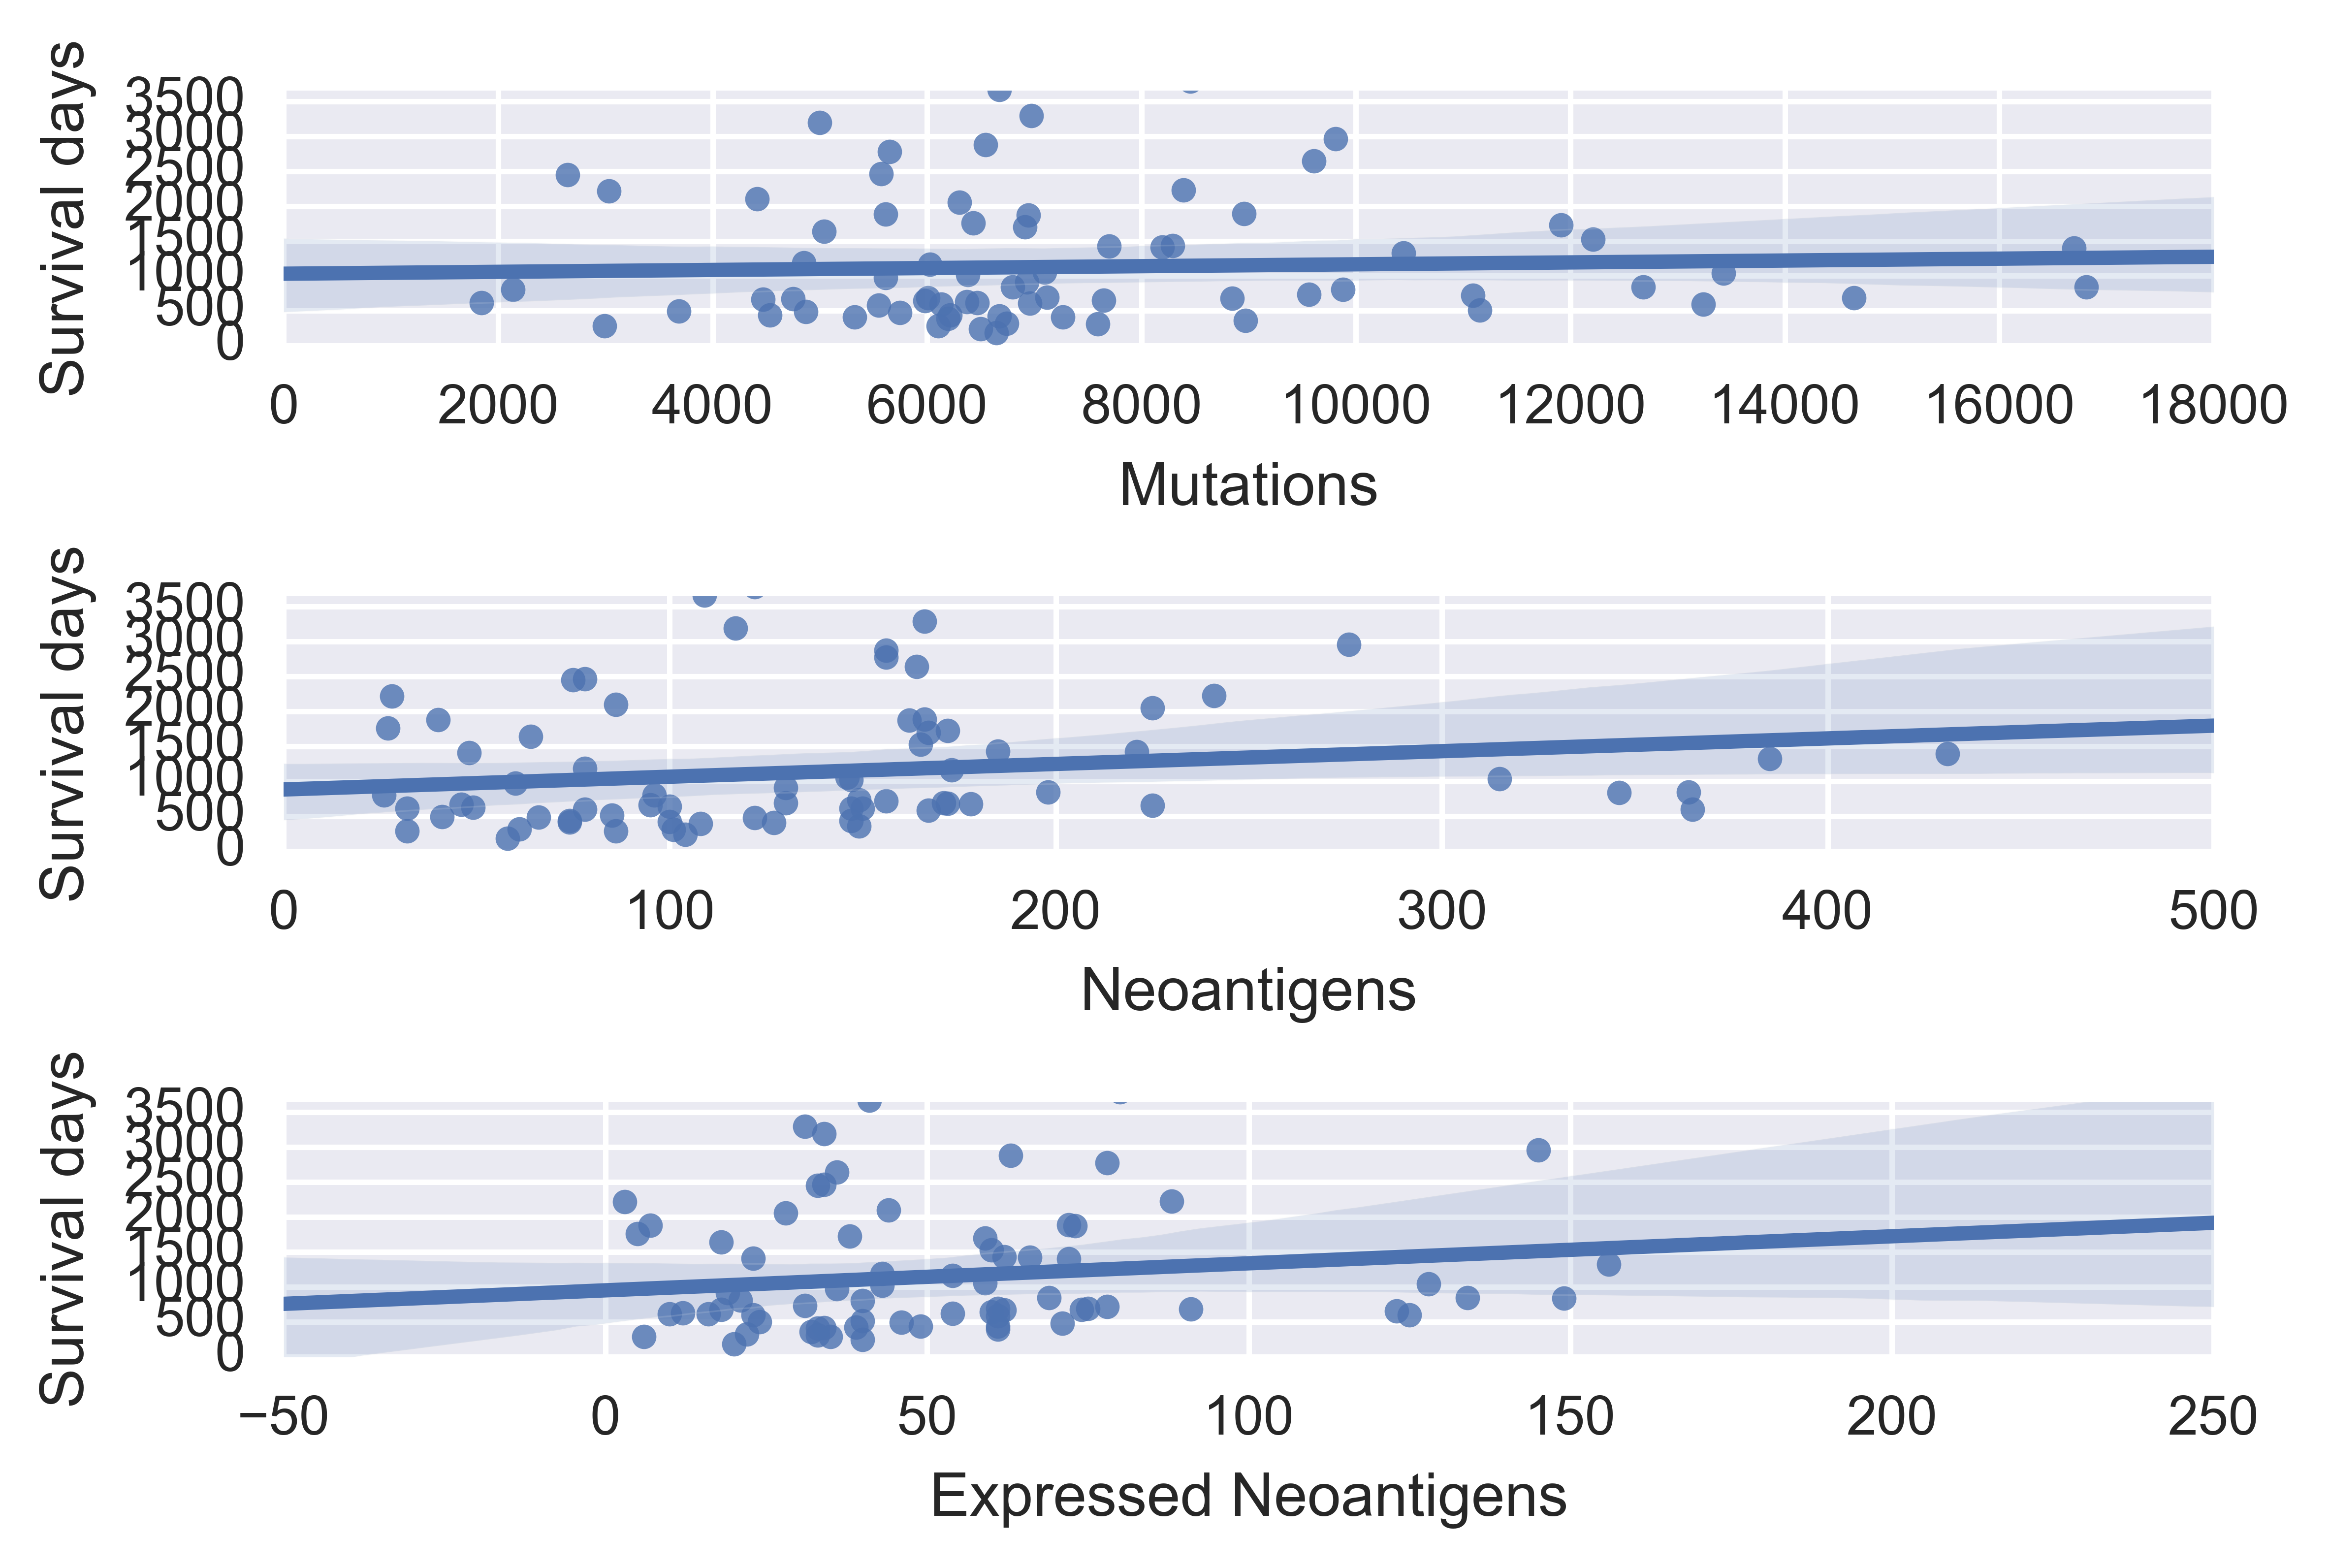

In [56]:
pyplot.subplot(311)
seaborn.regplot(
    data=new_cohort_df.ix[
        (new_cohort_df.specific_treatment == "primary/untreated")
        & (new_cohort_df.tissue_type == "solid")
        & (new_cohort_df.mutations < 38722)
    ],
    x="mutations",
    y="donor_survival_time",
    #logx=True,
    robust=True,
    #hue="tissue_type",
)
pyplot.ylim(ymin=0, ymax=365 * 10)
pyplot.xlabel("Mutations")
pyplot.ylabel("Survival days")

pyplot.subplot(312)
seaborn.regplot(
    data=new_cohort_df.ix[
        (new_cohort_df.specific_treatment == "primary/untreated")
        & (new_cohort_df.tissue_type == "solid")
        & (new_cohort_df.mutations < 38722)
    ],
    x="peptides",
    y="donor_survival_time",
    #logx=True,
    robust=True,
    #hue="tissue_type",
)
pyplot.ylim(ymin=0, ymax=365 * 10)
pyplot.xlabel("Neoantigens")
pyplot.ylabel("Survival days")


pyplot.subplot(313)
seaborn.regplot(
    data=new_cohort_df.ix[
        (new_cohort_df.specific_treatment == "primary/untreated")
        & (new_cohort_df.tissue_type == "solid")
        & (new_cohort_df.mutations < 38722)
    ],
    x="expressed peptides",
    y="donor_survival_time",
    #logx=True,
    robust=True,
    #hue="tissue_type",
)
pyplot.ylim(ymin=0, ymax=365 * 10)
pyplot.xlabel("Expressed Neoantigens")
pyplot.ylabel("Survival days")

pyplot.tight_layout()


In [116]:
new_cohort_df.tumour_stage

0      III
1      III
2      III
3      III
4      NaN
5      III
6      III
7      III
8      III
9      III
10      IV
11     III
12     III
13     III
14     NaN
15     III
16     NaN
17     III
18      IV
19     III
20     III
21     III
22     III
23     III
24      IV
      ... 
89     III
90     NaN
91     NaN
92     III
93     III
94     NaN
95      IV
96     III
97     III
98     III
99     III
100    III
101    III
102    III
103    III
104    III
105    NaN
106    NaN
107    NaN
108    III
109    III
110    III
111    NaN
112    III
113    NaN
Name: tumour_stage, dtype: object

index      coef  exp(coef)  se(coef)         z         p  \
0   log_cellularity  0.136955   1.146776  0.147356  0.929412  0.352675   
1          quantity -0.002019   0.997983  0.186155 -0.010846  0.991346   
2   log_cellularity  0.148281   1.159838  0.147482  1.005417  0.314696   
3          quantity -0.165319   0.847623  0.136182 -1.213956  0.224764   
4   log_cellularity  0.133519   1.142844  0.147280  0.906570  0.364634   
5          quantity -0.267071   0.765618  0.147663 -1.808658  0.070504   
6   log_cellularity  0.117803   1.125023  0.148200  0.794892  0.426676   
7          quantity -0.319138   0.726775  0.148559 -2.148221  0.031696   
8   log_cellularity  0.138488   1.148536  0.145379  0.952596  0.340795   
9          quantity -0.250947   0.778064  0.140870 -1.781409  0.074846   
10  log_cellularity  0.125768   1.134019  0.145865  0.862223  0.388565   
11         quantity -0.291248   0.747331  0.143849 -2.024676  0.042901   
12  log_cellularity  0.014776   1.014886  0.144310  0.102390  0.918447   
13         quantity -0.436468   0.646315  0.158552 -2.752840  0.005908   
14  log_cellularity -0.009225   0.990817  0.144188 -0.063979  0.948987   
15         quantity -0.480394   0.618540  0.162333 -2.959322  0.003083   

    lower 0.95  upper 0.95               quantity   n    norm_mean  \
0    -0.151922    0.425831              mutations  75     4.403835   
1    -0.366957    0.362919              mutations  75  7861.853333   
2    -0.140842    0.437403              mutations  74     4.402389   
3    -0.432289    0.101651              mutations  74  7444.824324   
4    -0.155207    0.422246               peptides  75     4.403835   
5    -0.556549    0.022406               peptides  75   148.346667   
6    -0.172728    0.408335               peptides  74     4.402389   
7    -0.610373   -0.027903               peptides  74   144.702703   
8    -0.146513    0.423489     expressed peptides  75     4.403835   
9    -0.527108    0.025214     expressed peptides  75    56.026667   
10   -0.160184    0.411720     expressed peptides  74     4.402389   
11   -0.573248   -0.009247     expressed peptides  74    54.905405   
12   -0.268129    0.297681  CIBERSORT T cells CD8  74     4.401950   
13   -0.747293   -0.125644  CIBERSORT T cells CD8  74     0.054320   
14   -0.291890    0.273440  CIBERSORT T cells CD8  73     4.400458   
15   -0.798630   -0.162158  CIBERSORT T cells CD8  73     0.053084   

       norm_std      raw coef  raw exp(coef)  raw se(coef)     raw z  \
0      0.133905  1.022772e+00       2.780893      1.100507  0.929364   
1   4768.231965 -4.234445e-07       1.000000      0.000039 -0.010846   
2      0.134228  1.104688e+00       3.018282      1.098749  1.005405   
3   3134.536825 -5.274109e-05       0.999947      0.000043 -1.213954   
4      0.133905  9.971174e-01       2.710457      1.099880  0.906570   
5     99.918141 -2.672901e-03       0.997331      0.001478 -1.808658   
6      0.134228  8.776329e-01       2.405200      1.104090  0.794892   
7     95.450874 -3.343478e-03       0.996662      0.001556 -2.148221   
8      0.133905  1.034220e+00       2.812912      1.085686  0.952596   
9     39.712471 -6.319099e-03       0.993701      0.003547 -1.781409   
10     0.134228  9.369683e-01       2.552232      1.086689  0.862223   
11    38.769840 -7.512222e-03       0.992516      0.003710 -2.024676   
12     0.133814  1.104210e-01       1.116748      1.078435  0.102390   
13     0.066396 -6.573669e+00       0.001397      2.387972 -2.752826   
14     0.134119 -6.878164e-02       0.933531      1.075072 -0.063979   
15     0.065994 -7.279331e+00       0.000690      2.459821 -2.959293   

       raw p  raw lower 0.95  raw upper 0.95  events  
0   0.352700       -1.134656        3.180200      61  
1   0.991346       -0.000077        0.000076      61  
2   0.314702       -1.049294        3.258670      60  
3   0.224765       -0.000138        0.000032      60  
4   0.364634       -1.159081        3.153316      61  
5   0.070

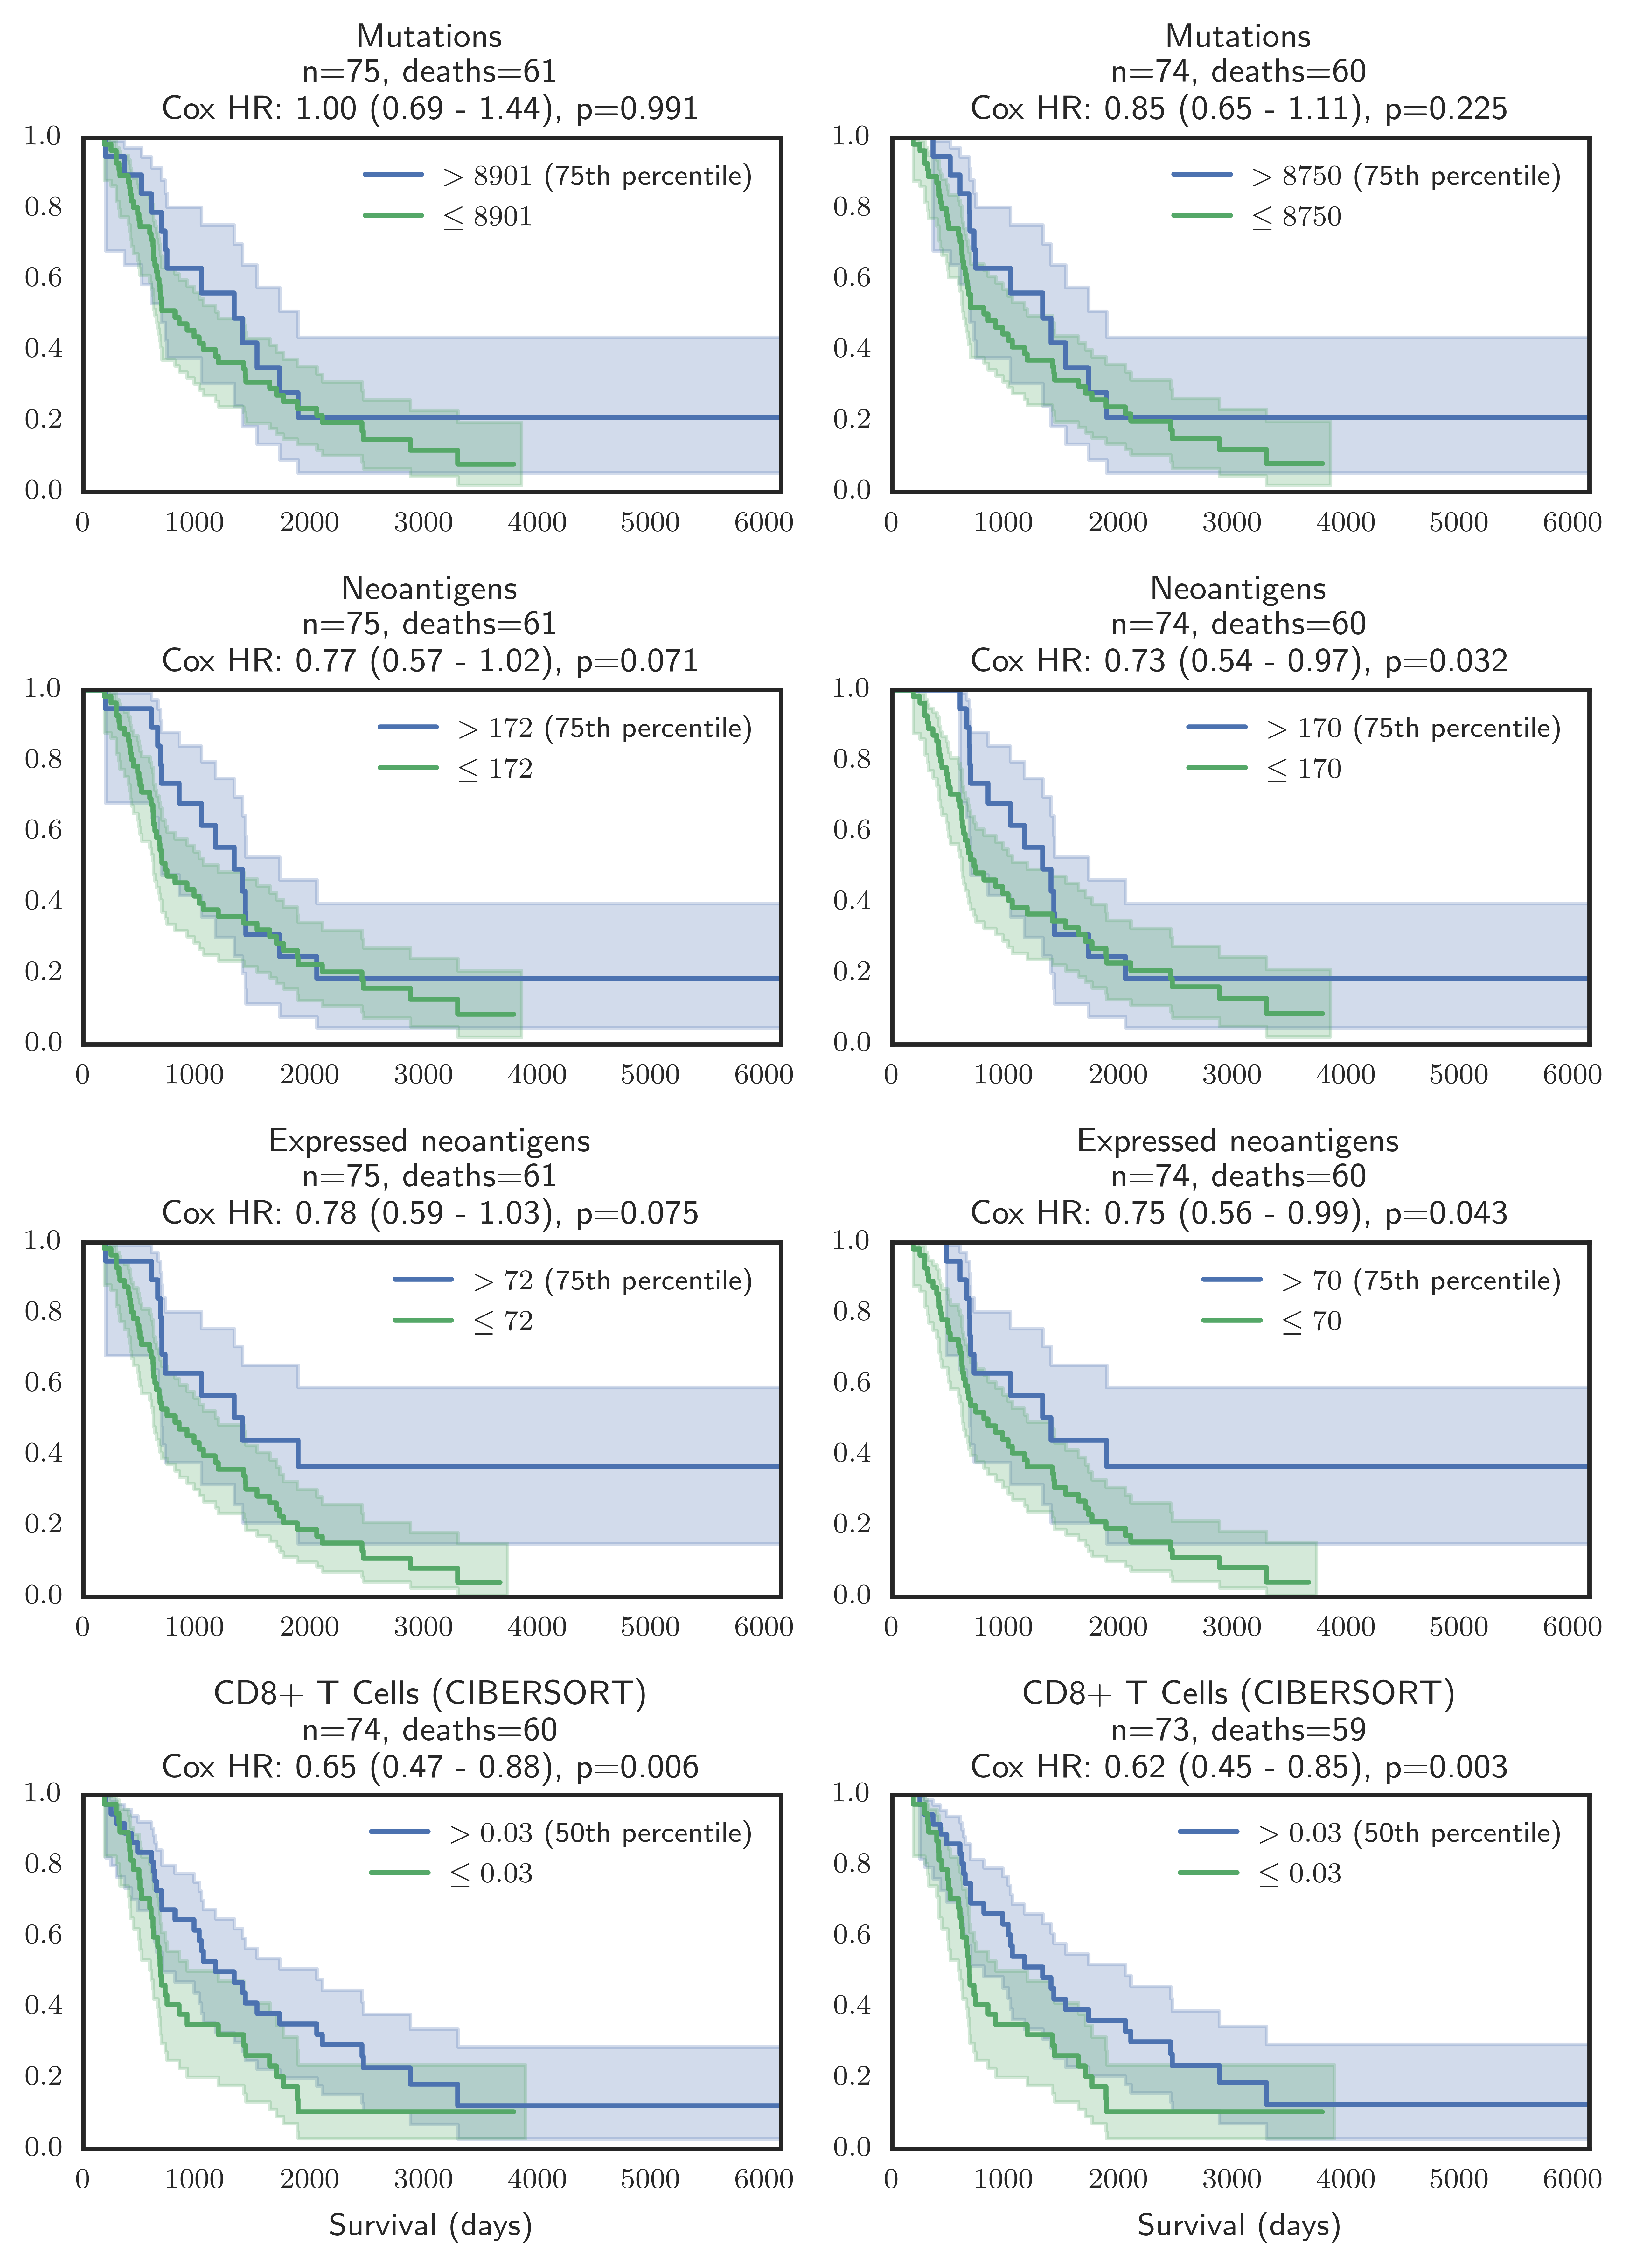

In [239]:
matplotlib.rc('text', usetex=True)

def draw(sub_df, quantity, quantile=0.50, label="$%s %0.0f$ (%dth percentile)", short_label="$%s %0.0f$", transform=None):
    sub_df = sub_df.copy()
    sub_df["event"] = sub_df.donor_vital_status == "deceased"
    threshold = sub_df[quantity].quantile(quantile)
    sub_df["high"] = sub_df[quantity] > threshold
    if transform is None:
        sub_df["quantity"] = sub_df[quantity]
    else:
        sub_df["quantity"] = transform(sub_df[quantity])
    sub_df["log_cellularity"] = numpy.log(sub_df["percentage_cellularity"].fillna(88))



    model = lifelines.KaplanMeierFitter()
    model.fit(
        sub_df.ix[sub_df.high, "donor_survival_time"],
        sub_df.ix[sub_df.high, "event"],
        label=label % (">", threshold, quantile * 100.0))
    ax = model.plot(ax=pyplot.gca())

    model.fit(
        sub_df.ix[~sub_df.high, "donor_survival_time"],
        sub_df.ix[~sub_df.high, "event"],
        label=short_label % ("\\leq", threshold))
    model.plot(ax=pyplot.gca())
    
    fit_df = sub_df[["donor_survival_time", "tumour_stage", "log_cellularity", "quantity", "event"]].ix[
            ~sub_df["quantity"].isnull()
    ]
    
    model2 = lifelines.CoxPHFitter(normalize=True)
    model2.fit(
        fit_df,
        'donor_survival_time',
        strata=["tumour_stage"],
        event_col="event")
    summary = model2.summary
    summary["quantity"] = quantity
    summary["n"] = len(fit_df)
    summary["norm_mean"] = model2._norm_mean
    summary["norm_std"] = model2._norm_std
    
    model3 = lifelines.CoxPHFitter(normalize=False)
    model3.fit(
        fit_df,
        'donor_survival_time',
        strata=["tumour_stage"],
        event_col="event")
    summary3 = model3.summary
    for c in summary3.columns:
        summary["raw %s" % c] = summary3[c]
    
    summary["quantity"] = quantity
    summary["n"] = len(fit_df)
    summary["norm_mean"] = model2._norm_mean
    summary["norm_std"] = model2._norm_std
    summary["events"] = fit_df.event.sum()
    return summary

sub_df = new_cohort_df.ix[
        (new_cohort_df.specific_treatment == "primary/untreated")
        & (new_cohort_df.tissue_type == "solid")
].copy()
sub_df["event"] = sub_df.donor_vital_status == "deceased"
sub_df2 = sub_df.ix[sub_df.mutations < 35000]

def make_title(label, summary):
    quantity_summary = summary.ix["quantity"]
    hr = "%0.2f (%0.2f - %0.2f)" % (
        numpy.exp(quantity_summary["coef"]),
        numpy.exp(quantity_summary["lower 0.95"]),
        numpy.exp(quantity_summary["upper 0.95"]),
    )
    pyplot.title(
        "%s\nn=%d, deaths=%d\nCox HR: %s, p=%0.3f" % (
            label,
            summary.n.iloc[0],
            summary.events.iloc[0],
            hr,
            quantity_summary.p))

summaries = []

seaborn.set_style('white')
seaborn.set_context('paper')
pyplot.figure(figsize=(6.5, 9))

pyplot.subplot(421)
summary = draw(sub_df, quantile=0.75, quantity="mutations")
summaries.append(summary)
make_title("Mutations", summary)
pyplot.xlabel("")

pyplot.subplot(422)
summary = draw(sub_df2, quantile=0.75, quantity="mutations")
summaries.append(summary)
make_title("Mutations", summary)
pyplot.xlabel("")

pyplot.subplot(423)
summary = draw(sub_df, quantile=0.75, quantity="peptides")
summaries.append(summary)
pyplot.title("Neoantigens\np=%0.3f" % summary.ix["quantity"].p)
make_title("Neoantigens", summary)
pyplot.xlabel("")

pyplot.subplot(424)
summary = draw(sub_df2, quantile=0.75, quantity="peptides")
summaries.append(summary)
pyplot.title("Neoantigens\np=%0.3f" % summary.ix["quantity"].p)
make_title("Neoantigens", summary)
pyplot.xlabel("")

pyplot.subplot(425)
summary = draw(sub_df, quantile=0.75, quantity="expressed peptides")
summaries.append(summary)
make_title("Expressed neoantigens", summary)
pyplot.xlabel("")

pyplot.subplot(426)
summary = draw(sub_df2, quantile=0.75, quantity="expressed peptides")
summaries.append(summary)
make_title("Expressed neoantigens", summary)
pyplot.xlabel("")

pyplot.subplot(427)
summary = draw(sub_df, "CIBERSORT T cells CD8", quantile=0.5, short_label="$%s %0.2f$", label="$%s %0.2f$ (%dth percentile)")
summaries.append(summary)
make_title("CD8+ T Cells (CIBERSORT)", summary)
pyplot.xlabel("Survival (days)")

pyplot.subplot(428)
summary = draw(sub_df2, "CIBERSORT T cells CD8", quantile=0.5, short_label="$%s %0.2f$", label="$%s %0.2f$ (%dth percentile)")
summaries.append(summary)
make_title("CD8+ T Cells (CIBERSORT)", summary)
pyplot.xlabel("Survival (days)")
pyplot.tight_layout()

summary_df = pandas.concat([x.reset_index() for x in summaries], ignore_index=True)
summary_df

In [243]:
num = 5
item = summary_df.ix[
    (summary_df["index"] == "quantity") &
    (summary_df["quantity"] == "expressed peptides")
].iloc[1]

print(
    "Protective effect of %d additional expressed neoantigens: %0.3f%% (%0.3f - %0.3f)" % (
            num,
            100.0 * (1 - numpy.exp(item["raw coef"] * num)),
            100.0 * (1 - numpy.exp(item["raw upper 0.95"] * num)),
            100.0 * (1 - numpy.exp(item["raw lower 0.95"] * num))))
        
num = 9
item = summary_df.ix[
    (summary_df["index"] == "quantity") &
    (summary_df["quantity"] == "peptides")
].iloc[1]

print(
    "Protective effect of %d additional neoantigens: %0.3f%% (%0.3f - %0.3f)" % (
            num,
            100.0 * (1 - numpy.exp(item["raw coef"] * num)),
            100.0 * (1 - numpy.exp(item["raw upper 0.95"] * num)),
            100.0 * (1 - numpy.exp(item["raw lower 0.95"] * num))))
        

Protective effect of 5 additional expressed neoantigens: 3.686% (0.119 - 7.126)
Protective effect of 9 additional neoantigens: 2.964% (0.263 - 5.593)


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [270]:
seaborn.set_style('white')
seaborn.set_context('paper')
pyplot.figure(figsize=(6.5, 7))

matplotlib.rc('text', usetex=False)

colors = seaborn.palettes.get_color_cycle()

treatments = ["primary/untreated", "primary/treated", "relapse/treated"]
treatment_to_color = dict(zip(treatments, colors))

def make_plot(x, y, sub_df):
    sub_df = sub_df.copy()
    sub_df[y] = sub_df[y] * 100.0
    for specific_treatment in treatments:
        sub_df2 = sub_df.ix[sub_df.specific_treatment == specific_treatment]
        if len(sub_df2):
            seaborn.regplot(
                data=sub_df2,
                x=x,
                y=y,
                label=specific_treatment,
                ci=False,
                fit_reg=False,
                color=treatment_to_color[specific_treatment])
    seaborn.regplot(data=sub_df, x=x, y=y, scatter=False, color='black')
        
    pyplot.ylim(ymin=0)
    pyplot.xlim(xmin=0)

pyplot.subplot(321)
make_plot(
    "mutations",
    "CIBERSORT T cells CD8",
    new_cohort_df.ix[
        (new_cohort_df.tissue_type == "solid")
    ])
pyplot.title("Solid tissue")
pyplot.legend(frameon=True, fancybox=True)
pyplot.xlabel("Mutations")
pyplot.ylabel("CD8+ T cells (%)")


pyplot.subplot(322)
make_plot(
    "mutations",
    "CIBERSORT T cells CD8",
    new_cohort_df.ix[
        (new_cohort_df.tissue_type == "ascites")
    ])
pyplot.title("Ascites")
pyplot.ylabel("")
pyplot.gca().yaxis.tick_right()
pyplot.tight_layout()
pyplot.xlabel("Mutations")



pyplot.subplot(323)
make_plot(
    "peptides",
    "CIBERSORT T cells CD8",
    new_cohort_df.ix[
        (new_cohort_df.tissue_type == "solid")
    ])
pyplot.xlabel("Neoantigens")
pyplot.ylabel("CD8+ T cells (%)")


pyplot.subplot(324)
make_plot(
    "peptides",
    "CIBERSORT T cells CD8",
    new_cohort_df.ix[
        (new_cohort_df.tissue_type == "ascites")
    ])
pyplot.ylabel("")
pyplot.gca().yaxis.tick_right()
pyplot.tight_layout()
pyplot.xlabel("Neoantigens")


pyplot.subplot(325)
make_plot(
    "expressed peptides",
    "CIBERSORT T cells CD8",
    new_cohort_df.ix[
        (new_cohort_df.tissue_type == "solid")
    ])
pyplot.xlabel("Expressed neoantigens")
pyplot.ylabel("CD8+ T cells (%)")

pyplot.subplot(326)
make_plot(
    "expressed peptides",
    "CIBERSORT T cells CD8",
    new_cohort_df.ix[
        (new_cohort_df.tissue_type == "ascites")
    ])
pyplot.ylabel("")
pyplot.gca().yaxis.tick_right()
pyplot.tight_layout()
pyplot.xlabel("Expressed neoantigens")


In [286]:
matplotlib.rc('text', usetex=False)
import matplotlib.gridspec as gridspec


sub_df = new_cohort_df.ix[
        (new_cohort_df.tissue_type == "solid")
].copy()
sub_df.index = sub_df.source_id

seaborn.set_style('white')
seaborn.set_context('paper')
pyplot.figure(figsize=(6.5, 7))

gs = gridspec.GridSpec(3, 1, height_ratios=[4,1])

for (i, treatment) in enumerate(treatments):
    print(i)
    heat_df = sub_df.ix[
        sub_df.specific_treatment == treatment
    ].copy()
    
    heat_df = heat_df[[
        c for c
        in heat_df.columns
        if c.startswith("CIBERSORT") and "RMSE" not in c and "Correlation" not in c and "value" not in c
    ]]
    heat_df.columns = [
        c.replace("CIBERSORT", "").strip()
        for c in heat_df.columns
    ]

    ax = pyplot.subplot(gs[i])
    seaborn.heatmap(heat_df)
    if i == 2:
        #ax.xaxis.tick_top()
        #pyplot.xticks(rotation=90)
        pass
    else:
        pyplot.xticks([])
    pyplot.title(treatment)
    pyplot.ylabel("")

pyplot.tight_layout()

0


IndexError: index 4 is out of bounds for axis 0 with size 4

In [288]:
gs

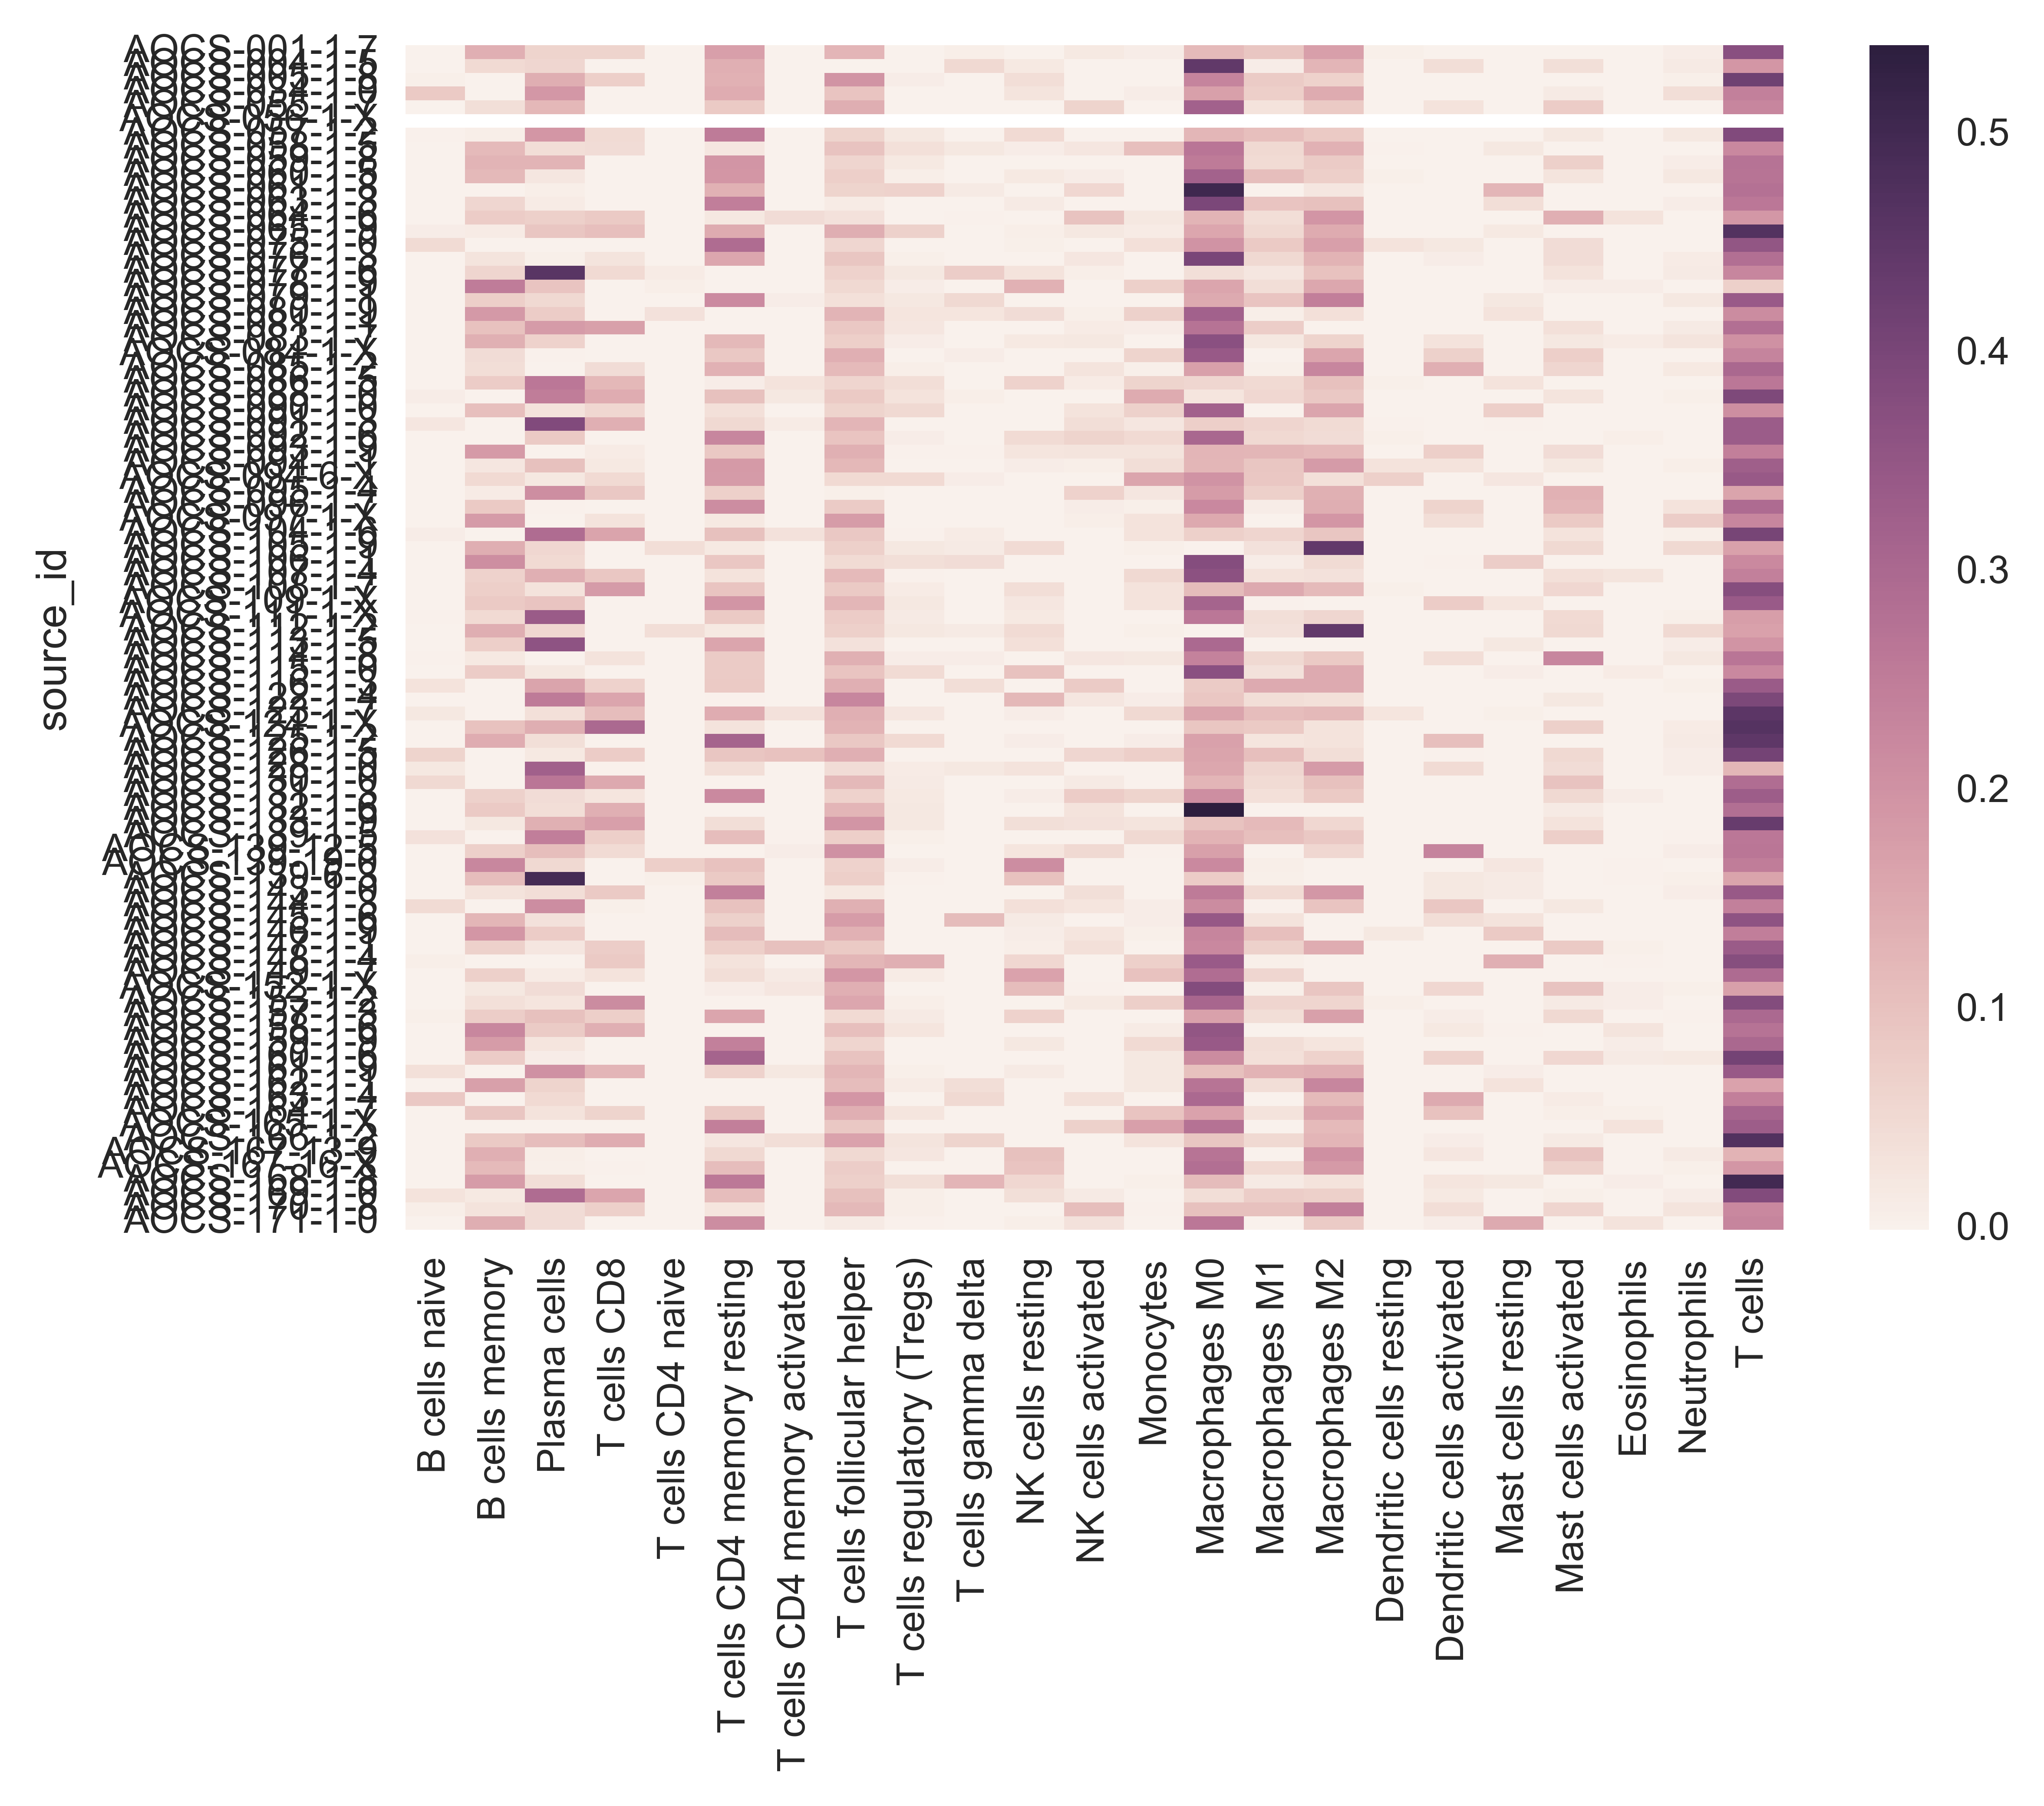

In [276]:
seaborn.heatmap(sub_df)

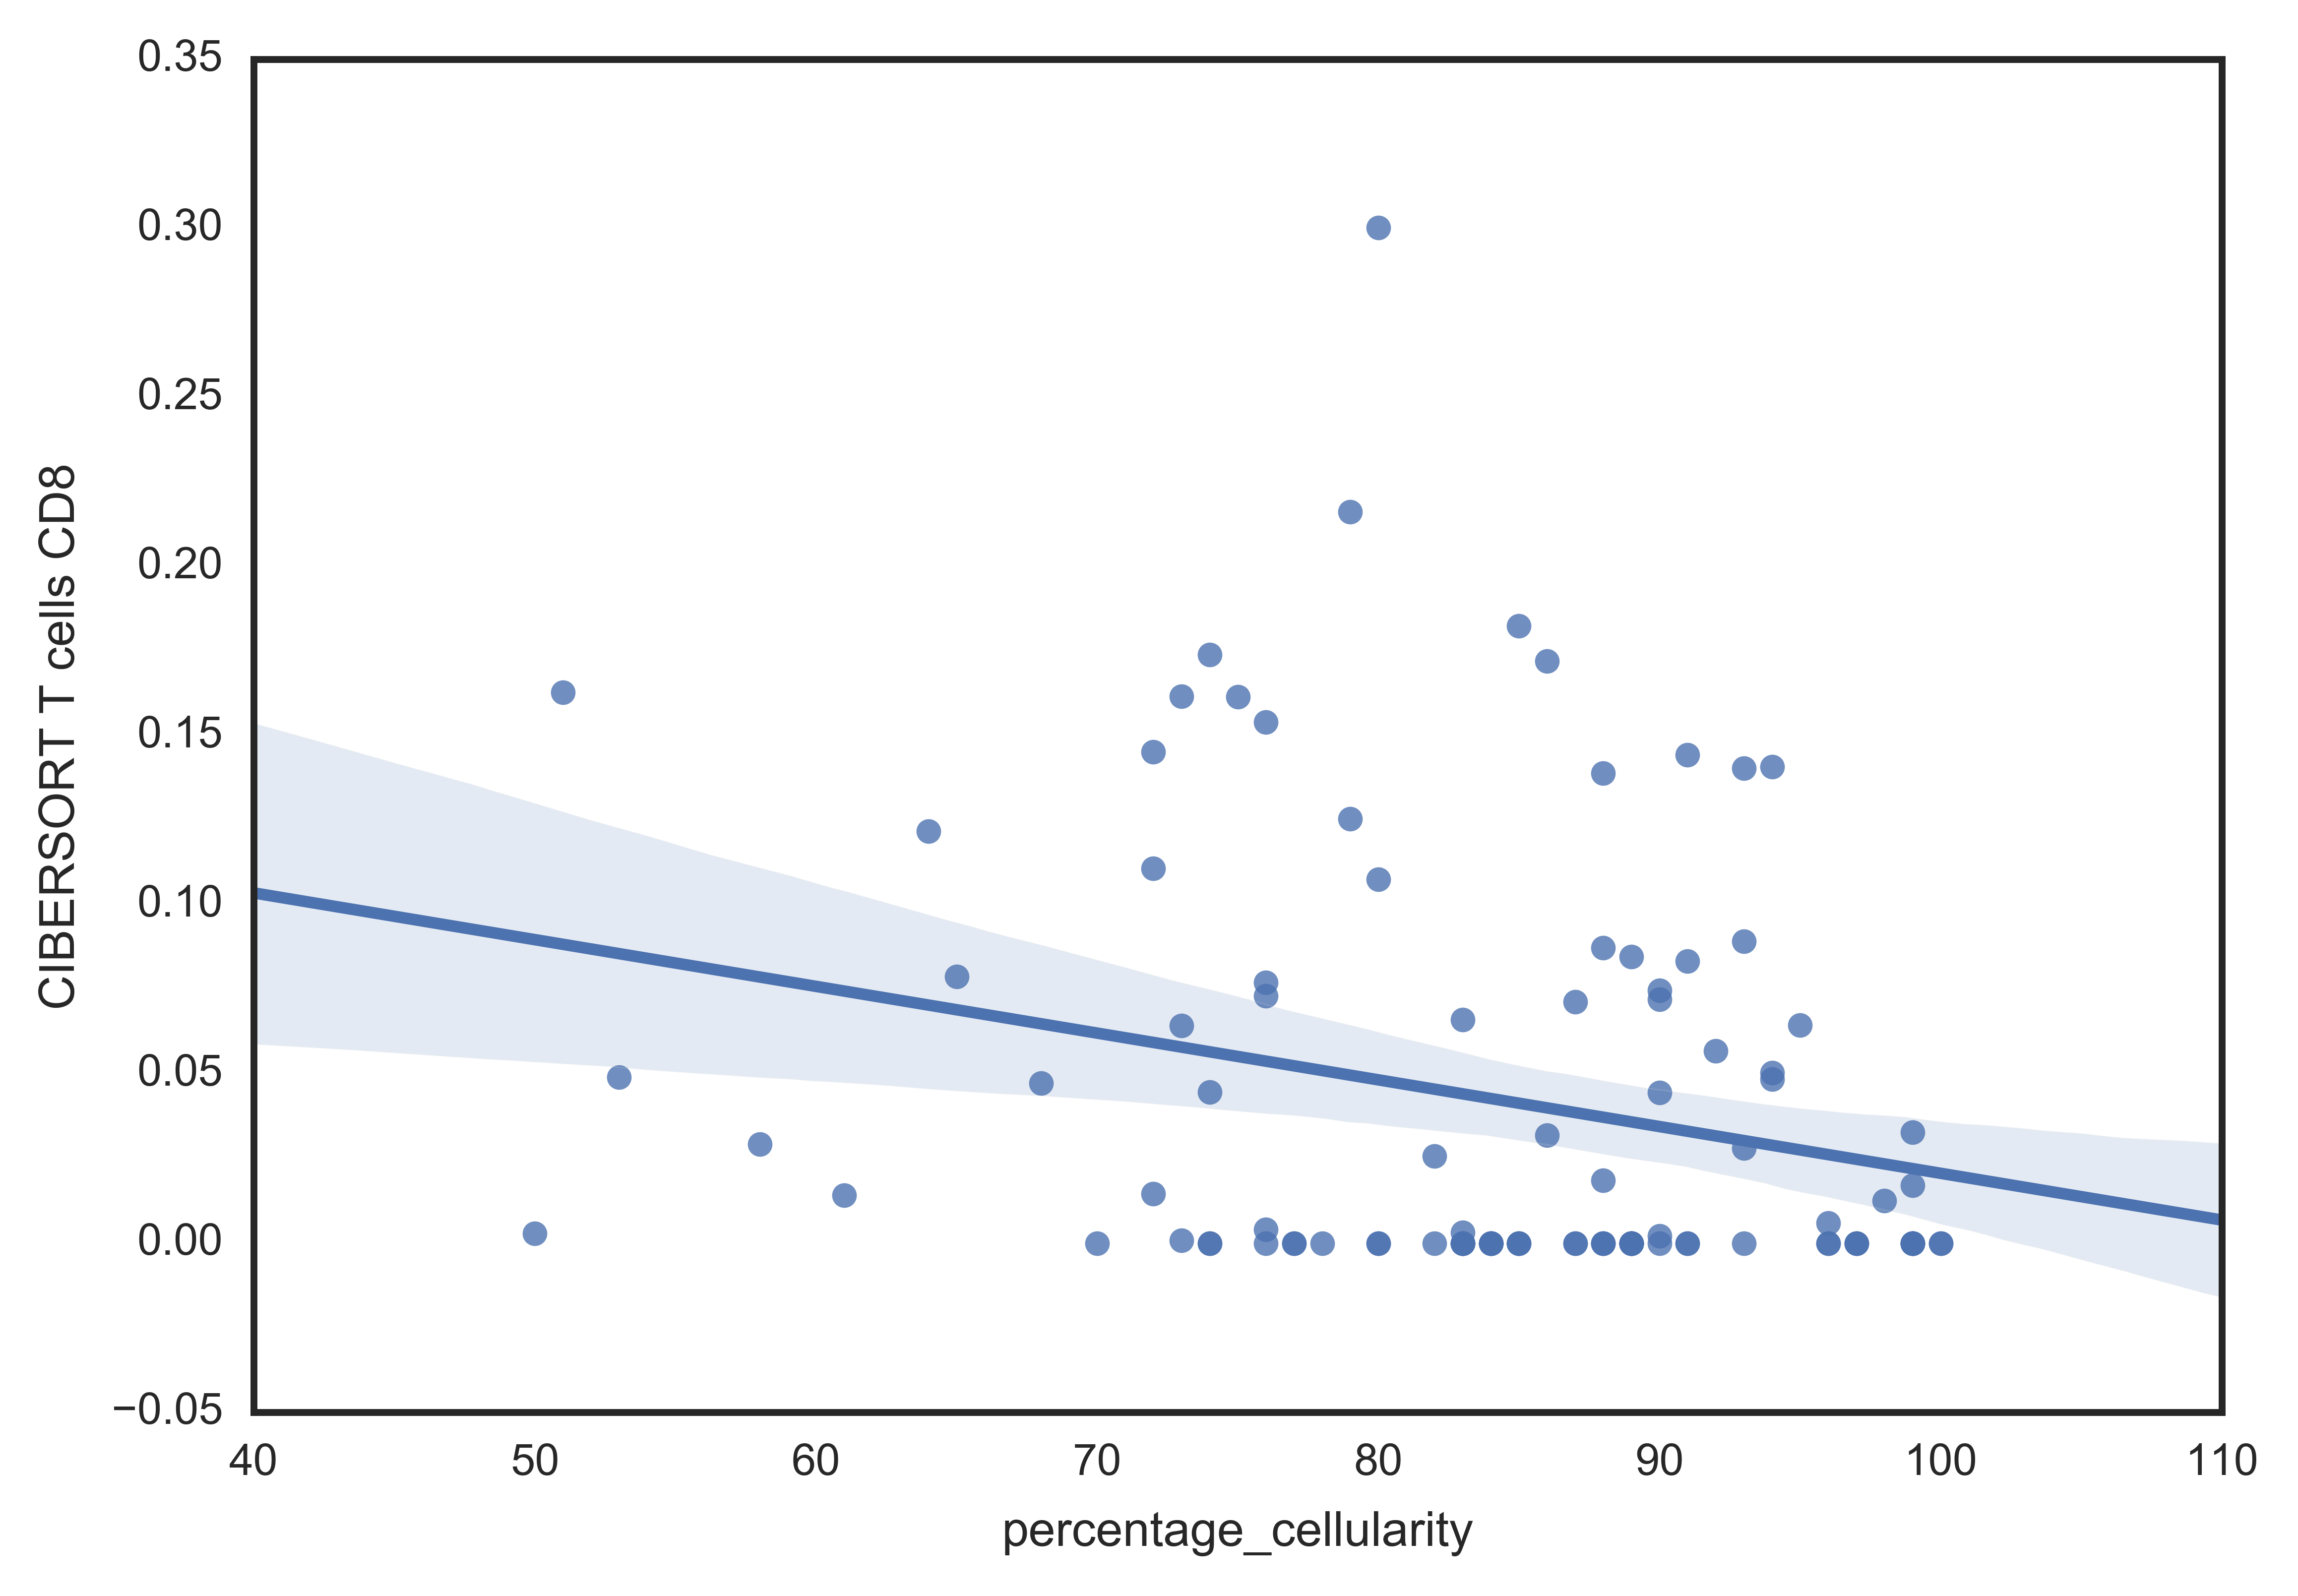

In [137]:
matplotlib.rc('text', usetex=False)

#seaborn.regplot(data=new_cohort_df, x="percentage_cellularity", y="expressed peptides")
seaborn.regplot(data=new_cohort_df, x="percentage_cellularity", y="CIBERSORT T cells CD8")

In [167]:
matplotlib.rc('text', usetex=False)

sub_df = new_cohort_df.ix[
        (new_cohort_df.specific_treatment == "primary/untreated")
        & (new_cohort_df.tissue_type == "solid")
].copy()
sub_df["event"] = sub_df.donor_vital_status == "deceased"

#sub_df["tumour_stage"] = sub_df.tumour_stage.fillna("Unknown")
sub_df["stage3"] = sub_df["tumour_stage"] == "III"
sub_df["stage4"] = sub_df["tumour_stage"] == "IV"

model = lifelines.CoxPHFitter()
model.fit(
    sub_df[["donor_survival_time", "stage4", "event"]],
    'donor_survival_time', 
    event_col="event")
model.summary

coef  exp(coef)  se(coef)         z         p  lower 0.95  \
stage4 -0.21919   0.803169  0.148846 -1.472598  0.140859   -0.510987   

        upper 0.95  
stage4    0.072607

In [169]:
sub_df.stage4.value_counts()

False    63
True     12
Name: stage4, dtype: int64

coef  exp(coef)  se(coef)         z        p  lower 0.95  \
quantity  0.192723   1.212547  0.153767  1.253346  0.21008   -0.108721   

          upper 0.95  
quantity    0.494167

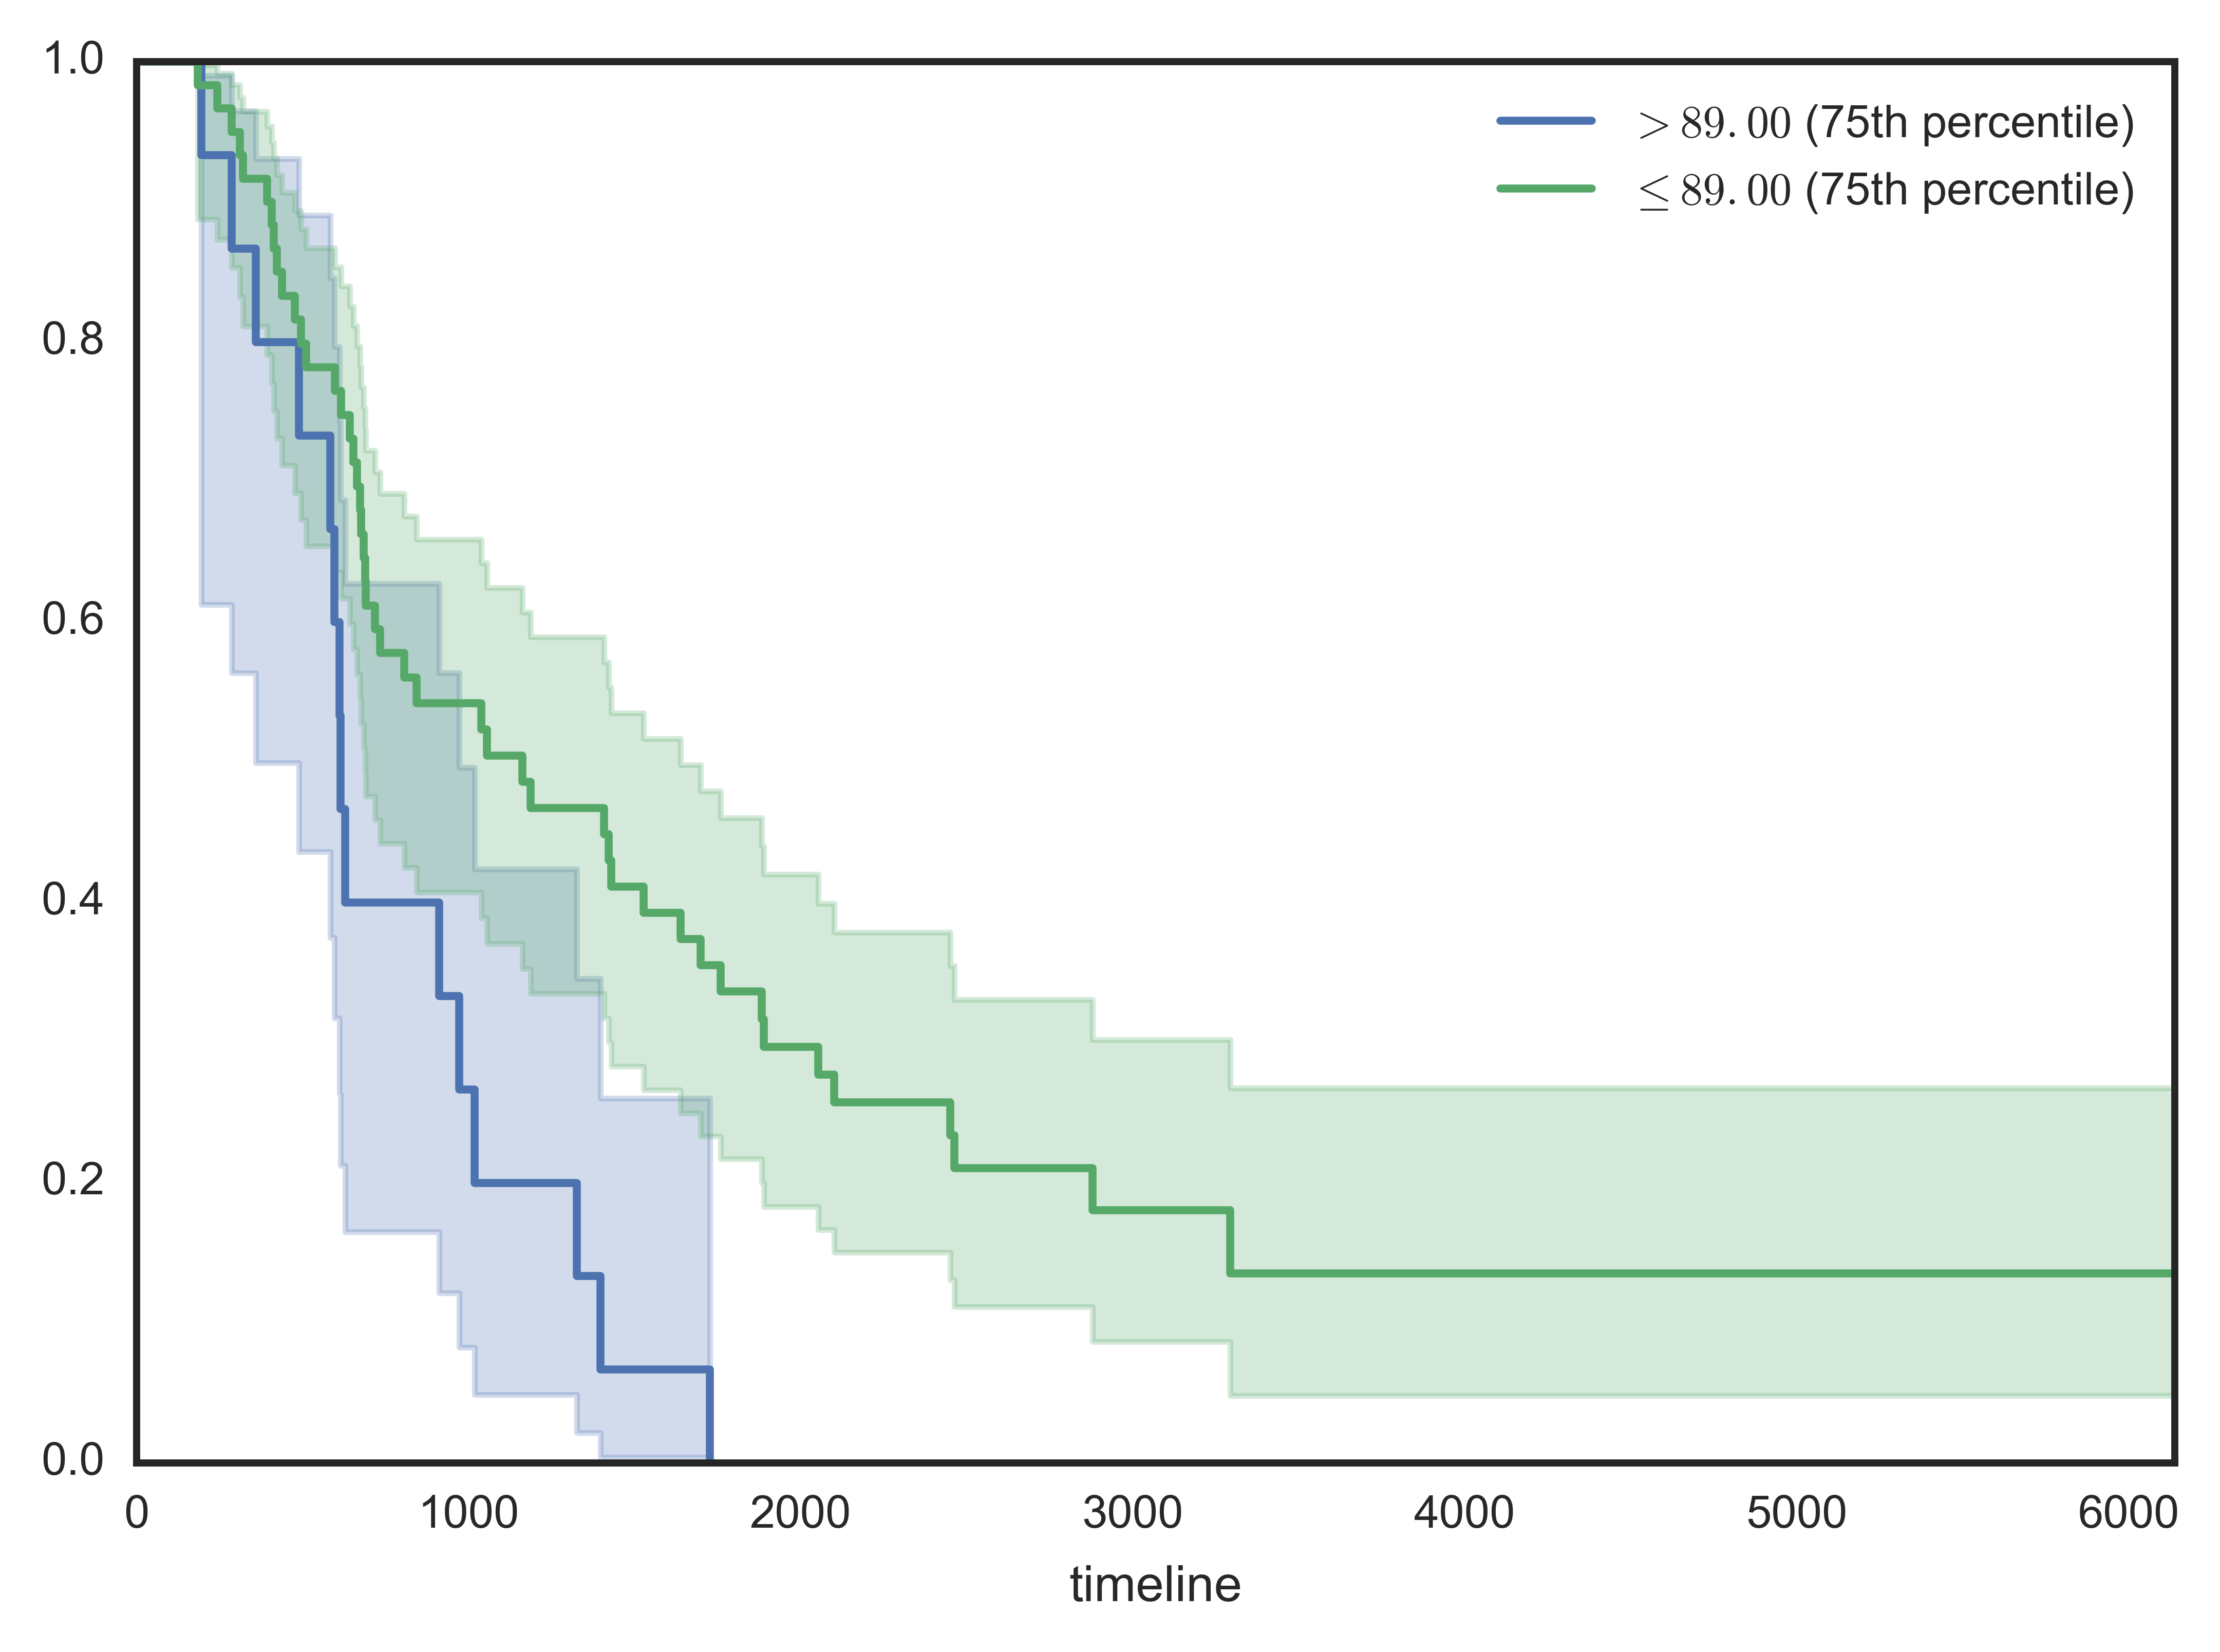

In [139]:
matplotlib.rc('text', usetex=False)

draw(sub_df, "percentage_cellularity", transform=numpy.log)

In [126]:
numpy.exp(model.summary.coef)
model.summary

coef  exp(coef)  se(coef)         z         p  \
CIBERSORT T cells -0.35212   0.703196  0.140181 -2.511899  0.012008   

                   lower 0.95  upper 0.95  
CIBERSORT T cells    -0.62693    -0.07731

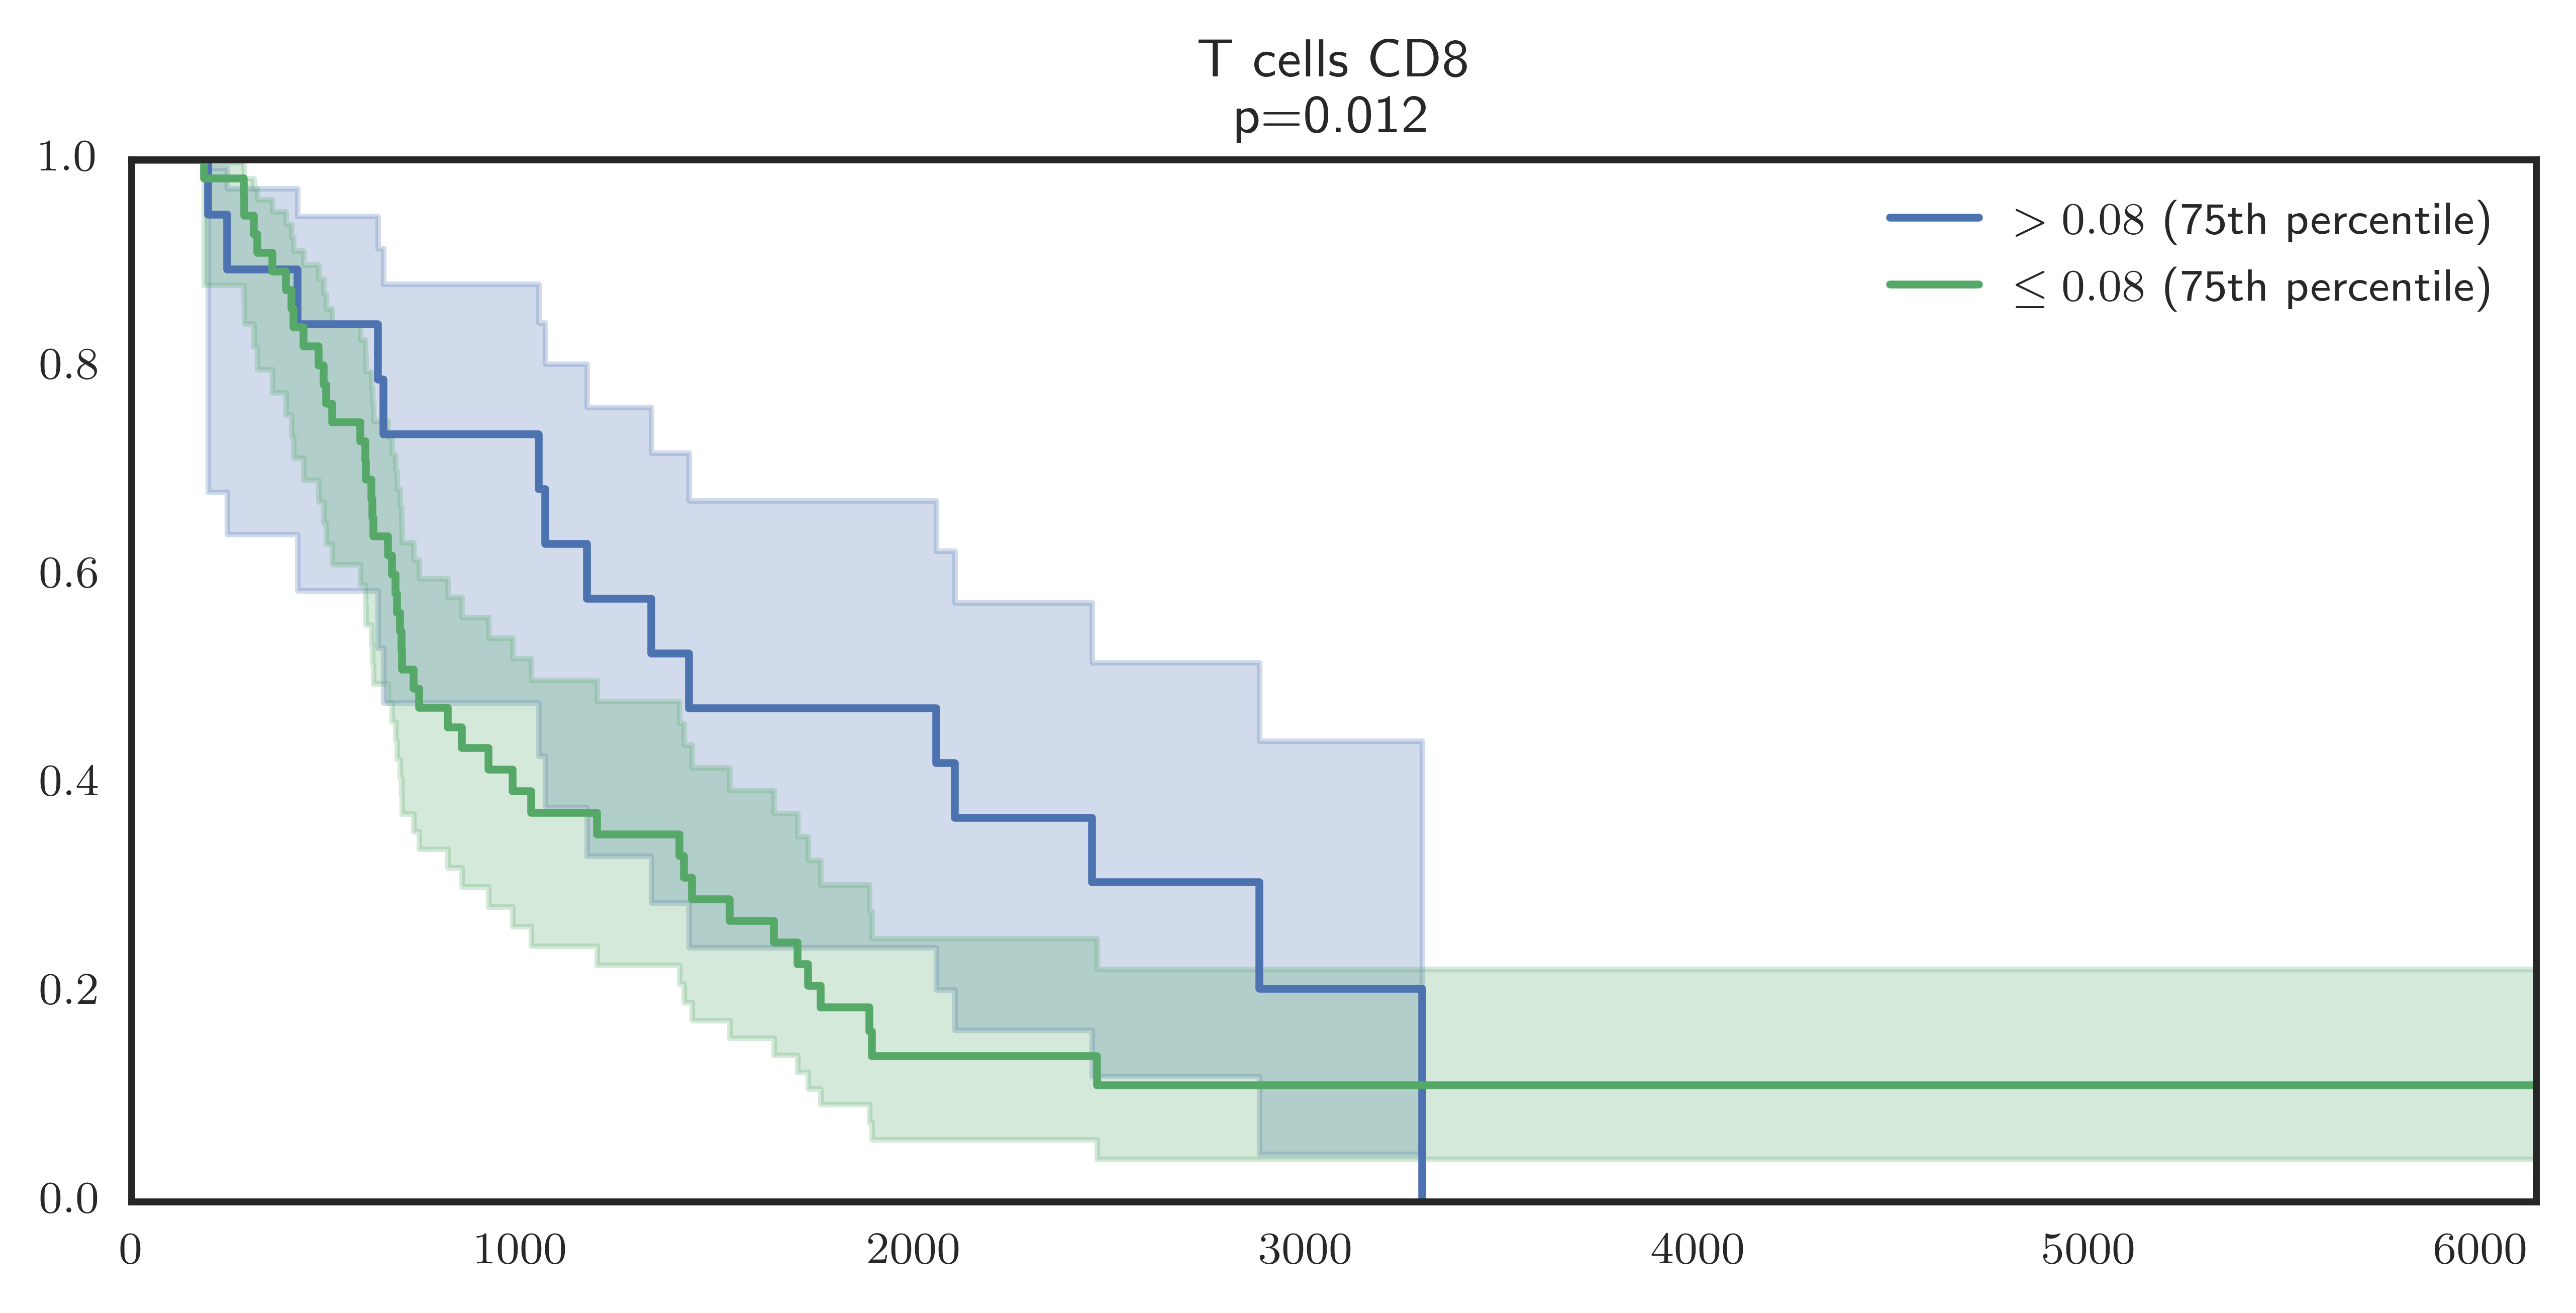

In [105]:
def draw(sub_df, quantity, quantile=0.75, label="$%s %0.2f$ (75th percentile)"):
    sub_df = sub_df.copy()
    sub_df["event"] = sub_df.donor_vital_status == "deceased"
    threshold = sub_df[quantity].quantile(.75)
    sub_df["high_burden"] = sub_df[quantity] > threshold

    model = lifelines.KaplanMeierFitter()
    model.fit(
        sub_df.ix[sub_df.high_burden, "donor_survival_time"],
        sub_df.ix[sub_df.high_burden, "event"],
        label=label % (">", threshold))
    ax = model.plot(ax=pyplot.gca())

    model.fit(
        sub_df.ix[~sub_df.high_burden, "donor_survival_time"],
        sub_df.ix[~sub_df.high_burden, "event"],
        label=label % ("\\leq", threshold))
    model.plot(ax=pyplot.gca())
    
    model2 = lifelines.CoxPHFitter()
    model2.fit(
        sub_df[["donor_survival_time", quantity, "event"]].ix[~sub_df[quantity].isnull()],
        'donor_survival_time', 
        event_col="event")
    return model2.summary

sub_df = new_cohort_df.ix[
        (new_cohort_df.specific_treatment == "primary/untreated")
        & (new_cohort_df.tissue_type == "solid")
].copy()
sub_df["event"] = sub_df.donor_vital_status == "deceased"


seaborn.set_style('white')
seaborn.set_context('paper')
pyplot.figure(figsize=(6.5, 9))

pyplot.subplot(311)
summary = draw(sub_df, "CIBERSORT T cells CD8")
pyplot.title("T cells CD8\np=%0.3f" % summary.p)
pyplot.xlabel("")

'''
pyplot.subplot(312)
summary = draw(sub_df, "peptides")
pyplot.title("Neoantigens\np=%0.3f" % summary.p)
pyplot.xlabel("")

pyplot.subplot(313)
summary = draw(sub_df, "expressed peptides")
pyplot.title("Expressed neoantigens\np=%0.3f" % summary.p)
pyplot.xlabel("Survival (days)")
'''

pyplot.tight_layout()

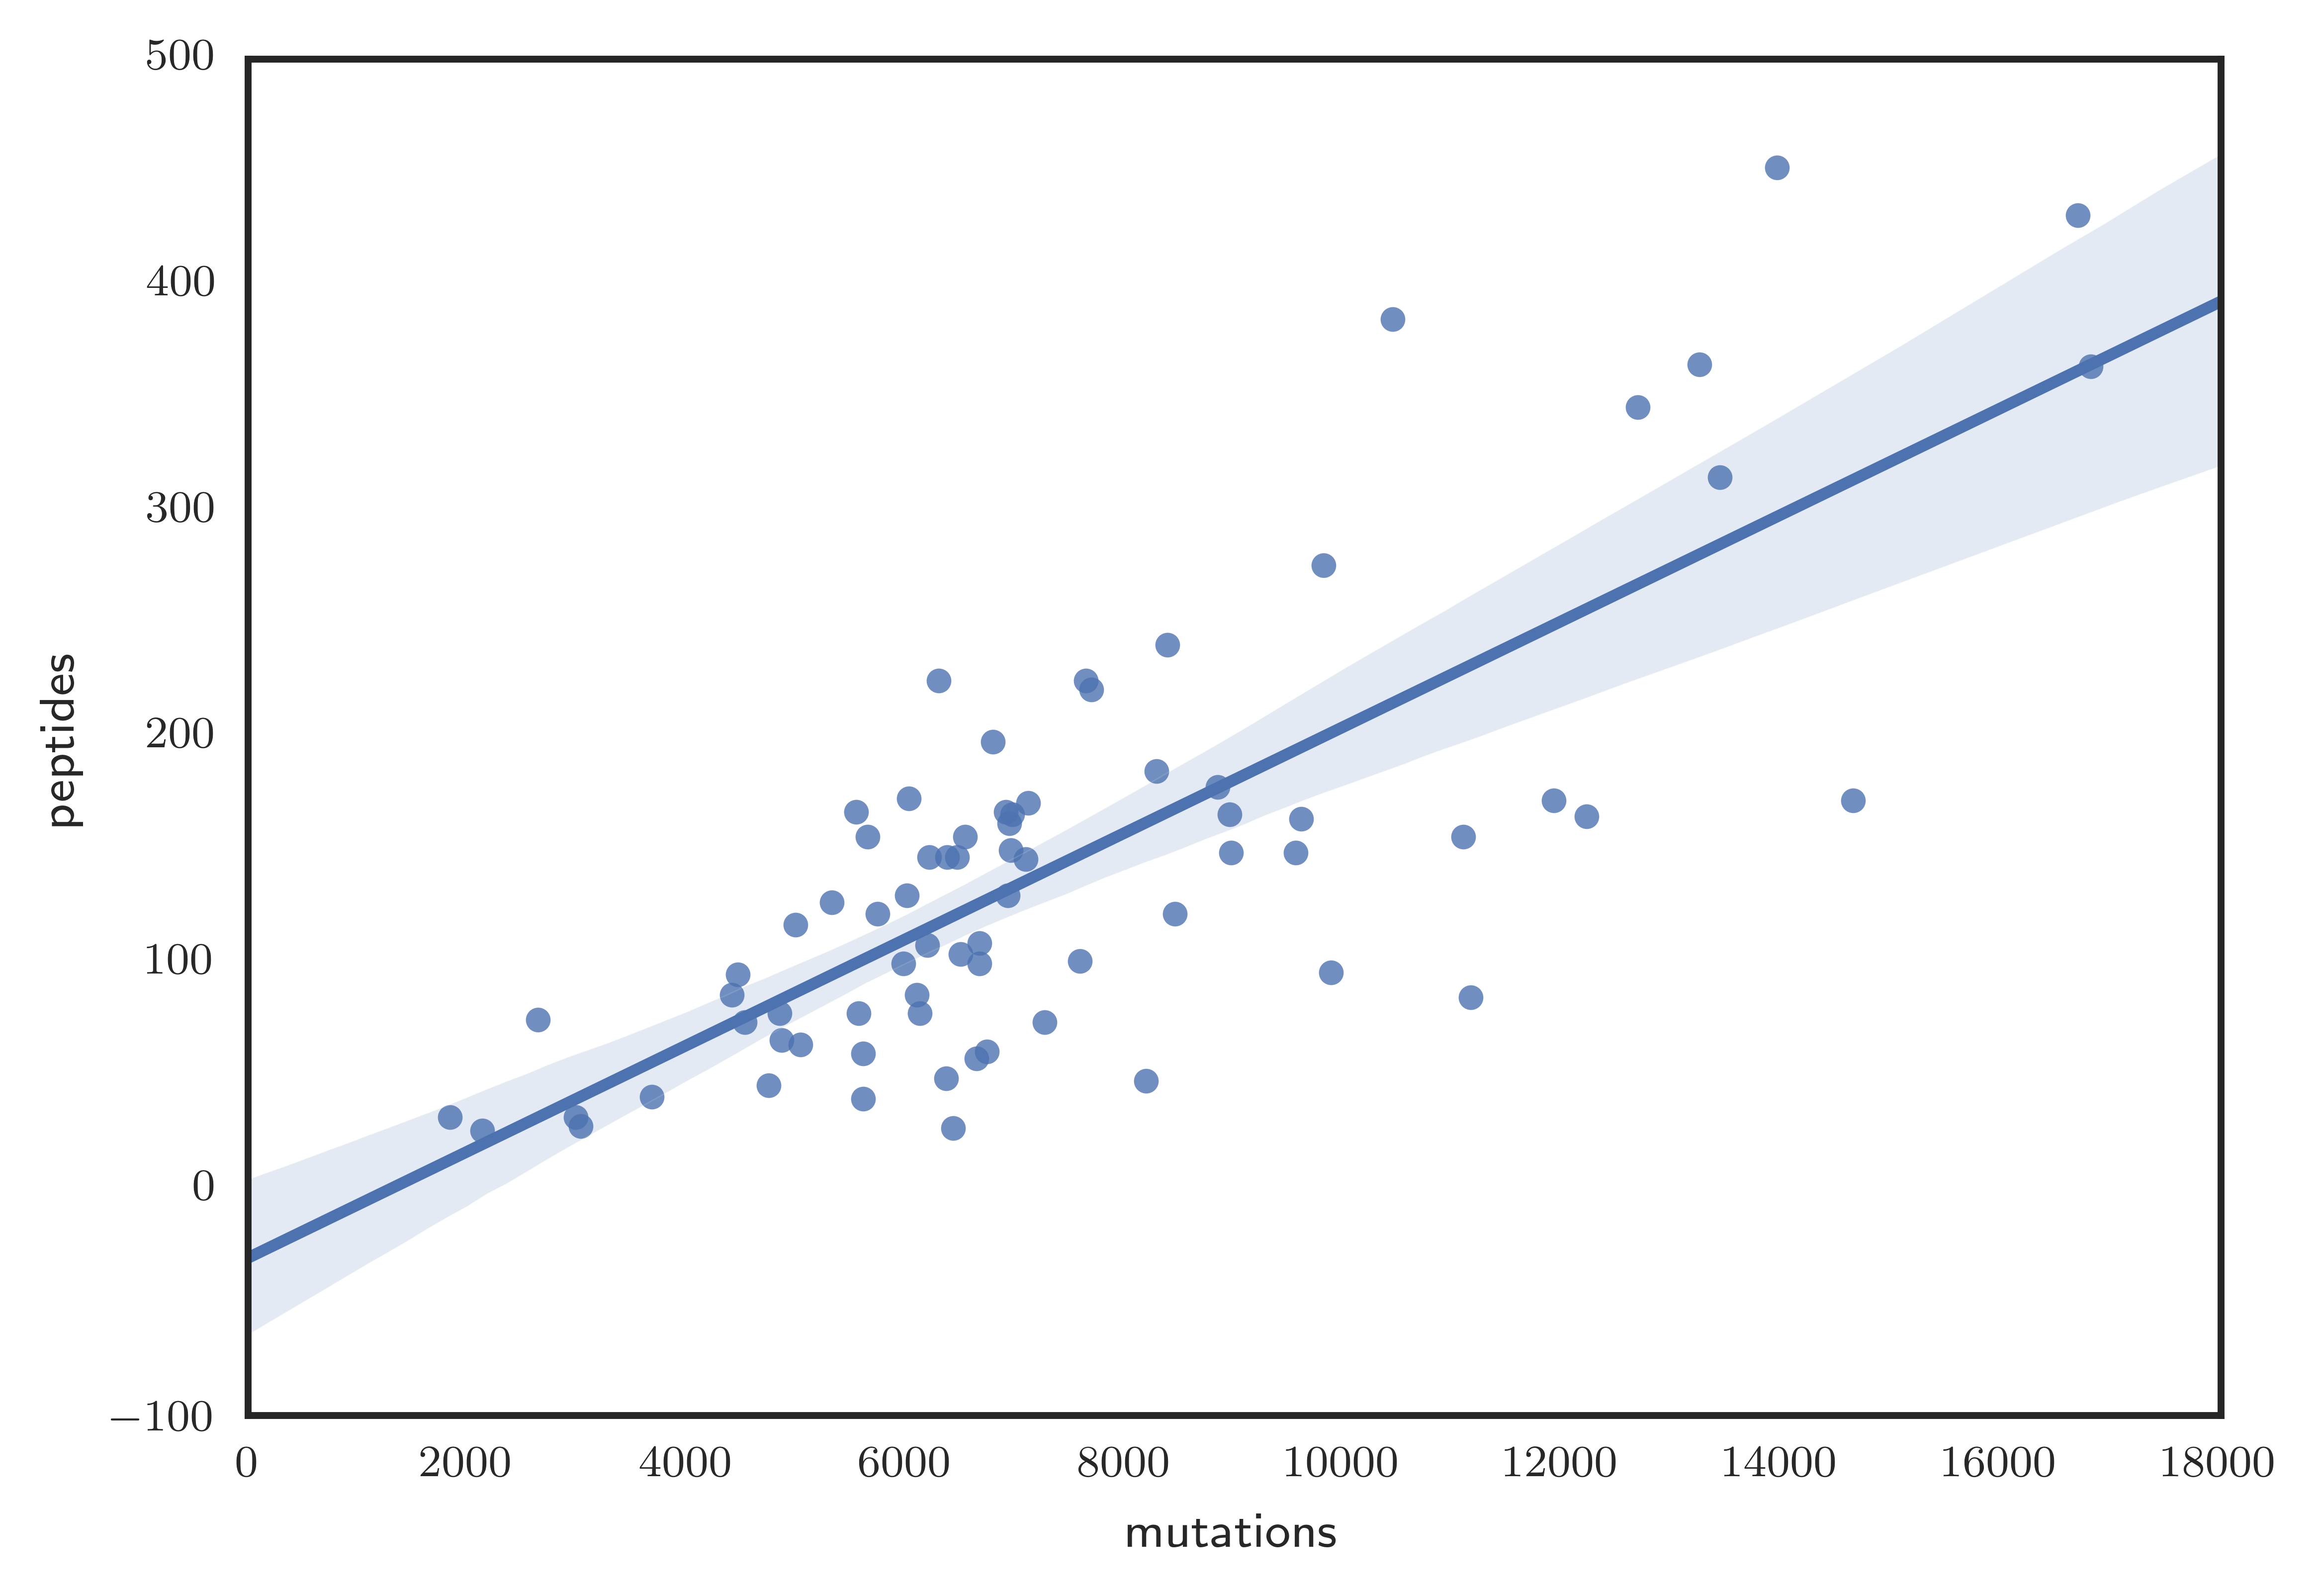

In [110]:
seaborn.regplot(data=sub_df.ix[sub_df.mutations < 35000], x="mutations", y="peptides")

In [113]:
(sub_df.mutations > 35000).sum()

1

In [108]:
sub_df = new_cohort_df.ix[
        (new_cohort_df.specific_treatment == "primary/untreated")
        & (new_cohort_df.tissue_type == "solid")
].copy()
sub_df["event"] = sub_df.donor_vital_status == "deceased"

for c in new_cohort_df.columns:
    if c.startswith("CIBERSORT"):
        model = lifelines.CoxPHFitter()
        model.fit(
            sub_df[["donor_survival_time", c, "event"]].ix[~sub_df[c].isnull()],
            'donor_survival_time', 
            event_col="event")
        print(c, model.summary.p)

CIBERSORT B cells naive CIBERSORT B cells naive    0.730261
Name: p, dtype: float64
CIBERSORT B cells memory CIBERSORT B cells memory    0.227848
Name: p, dtype: float64
CIBERSORT Plasma cells CIBERSORT Plasma cells    0.644238
Name: p, dtype: float64
CIBERSORT T cells CD8 CIBERSORT T cells CD8    0.012418
Name: p, dtype: float64
CIBERSORT T cells CD4 naive CIBERSORT T cells CD4 naive    0.137522
Name: p, dtype: float64
CIBERSORT T cells CD4 memory resting CIBERSORT T cells CD4 memory resting    0.18495
Name: p, dtype: float64
CIBERSORT T cells CD4 memory activated CIBERSORT T cells CD4 memory activated    0.117988
Name: p, dtype: float64
CIBERSORT T cells follicular helper CIBERSORT T cells follicular helper    0.030304
Name: p, dtype: float64
CIBERSORT T cells regulatory (Tregs) CIBERSORT T cells regulatory (Tregs)    0.33348
Name: p, dtype: float64
CIBERSORT T cells gamma delta CIBERSORT T cells gamma delta    0.285092
Name: p, dtype: float64
CIBERSORT NK cells resting CIBERSORT NK 

In [88]:
new_cohort_df.columns.tolist()

['source_id',
 'RNA_id',
 'RNA biospecimen',
 'DNA_id',
 'DNA_biospecimen',
 'specimen_type_description',
 'CollectionPoint',
 'SpecimenType',
 'RNA data file',
 'DNA_sample_string',
 'icgc_sample_id',
 'project_code',
 'submitted_sample_id',
 'icgc_specimen_id',
 'submitted_specimen_id',
 'icgc_donor_id',
 'submitted_donor_id',
 'analyzed_sample_interval',
 'percentage_cellularity',
 'level_of_cellularity',
 'study',
 'study_specimen_involved_in',
 'specimen_type',
 'specimen_type_other',
 'specimen_interval',
 'specimen_donor_treatment_type',
 'specimen_donor_treatment_type_other',
 'specimen_processing',
 'specimen_storage',
 'tumour_confirmed',
 'tumour_histological_type',
 'tumour_grading_system',
 'tumour_grade',
 'tumour_stage_system',
 'tumour_stage',
 'cohort',
 'donor',
 'tissue_type',
 'timepoint',
 'treated',
 'metastasis',
 'interval_days',
 'bam_filename_tumor_dna',
 'bam_filename_tumor_rna',
 'treated_paired',
 'timepoint_paired',
 'protein changing',
 'peptides',
 'expr

In [95]:
sub_df = new_cohort_df.ix[
        (new_cohort_df.specific_treatment == "primary/untreated")
        & (new_cohort_df.tissue_type == "solid")
].copy()
sub_df["event"] = sub_df.donor_vital_status == "deceased"

model = lifelines.CoxPHFitter()
model.fit(
    sub_df[["donor_survival_time", "expressed peptides", "event"]],
    'donor_survival_time', 
    event_col="event")
model.print_summary()
#model.plot()
model.summary['p']

n=75, number of events=61

                         coef  exp(coef)  se(coef)          z         p  lower 0.95  upper 0.95   
expressed peptides -2.578e-01  7.727e-01 1.416e-01 -1.821e+00 6.861e-02  -5.354e-01   1.974e-02  .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.572


expressed peptides    0.068606
Name: p, dtype: float64

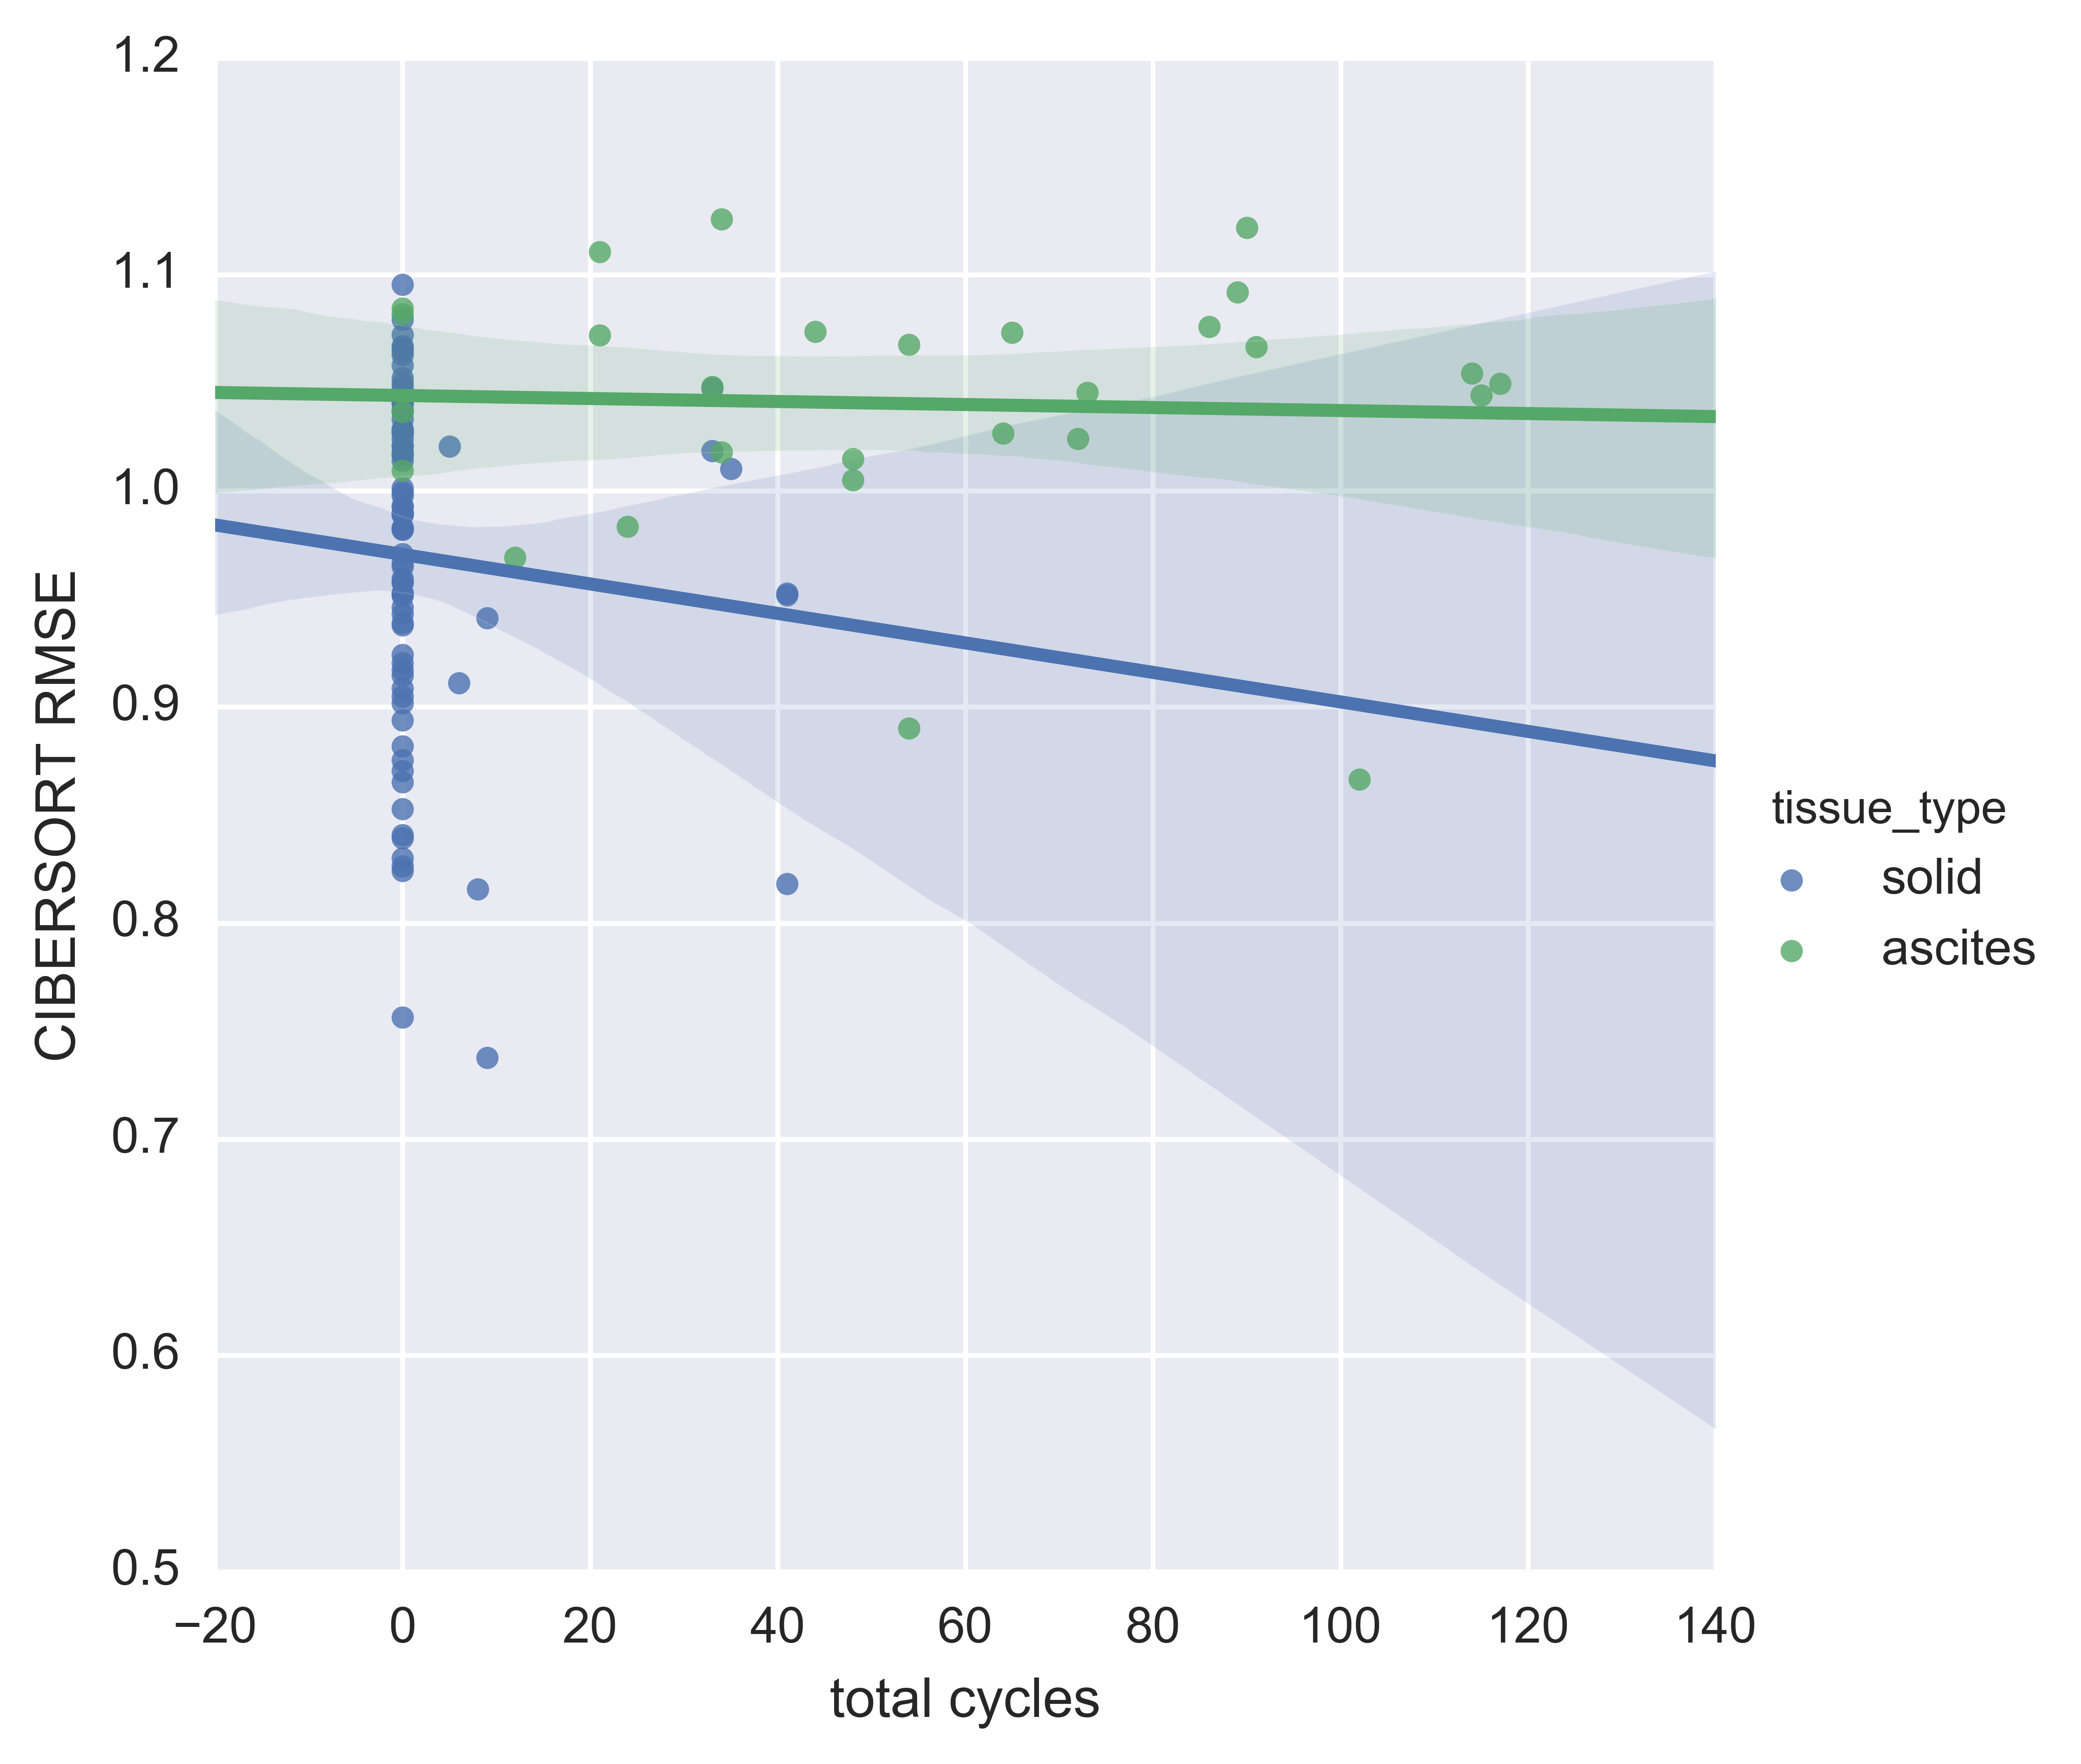

In [37]:


seaborn.lmplot(
    data=new_cohort_df,
    #.ix[
    #    (new_cohort_df.specific_treatment == 'relapse/treated')
    #    & (new_cohort_df.tissue_type == "ascites")
    #],
    #x="Cycles of cyclophosphamide",
    x="total cycles",
    #y="CIBERSORT T cells CD8",
    y="CIBERSORT RMSE",
    hue="tissue_type",
    #logx=True,
)


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/seaborn/linearmodels.py:267: RuntimeWarning: divide by zero encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


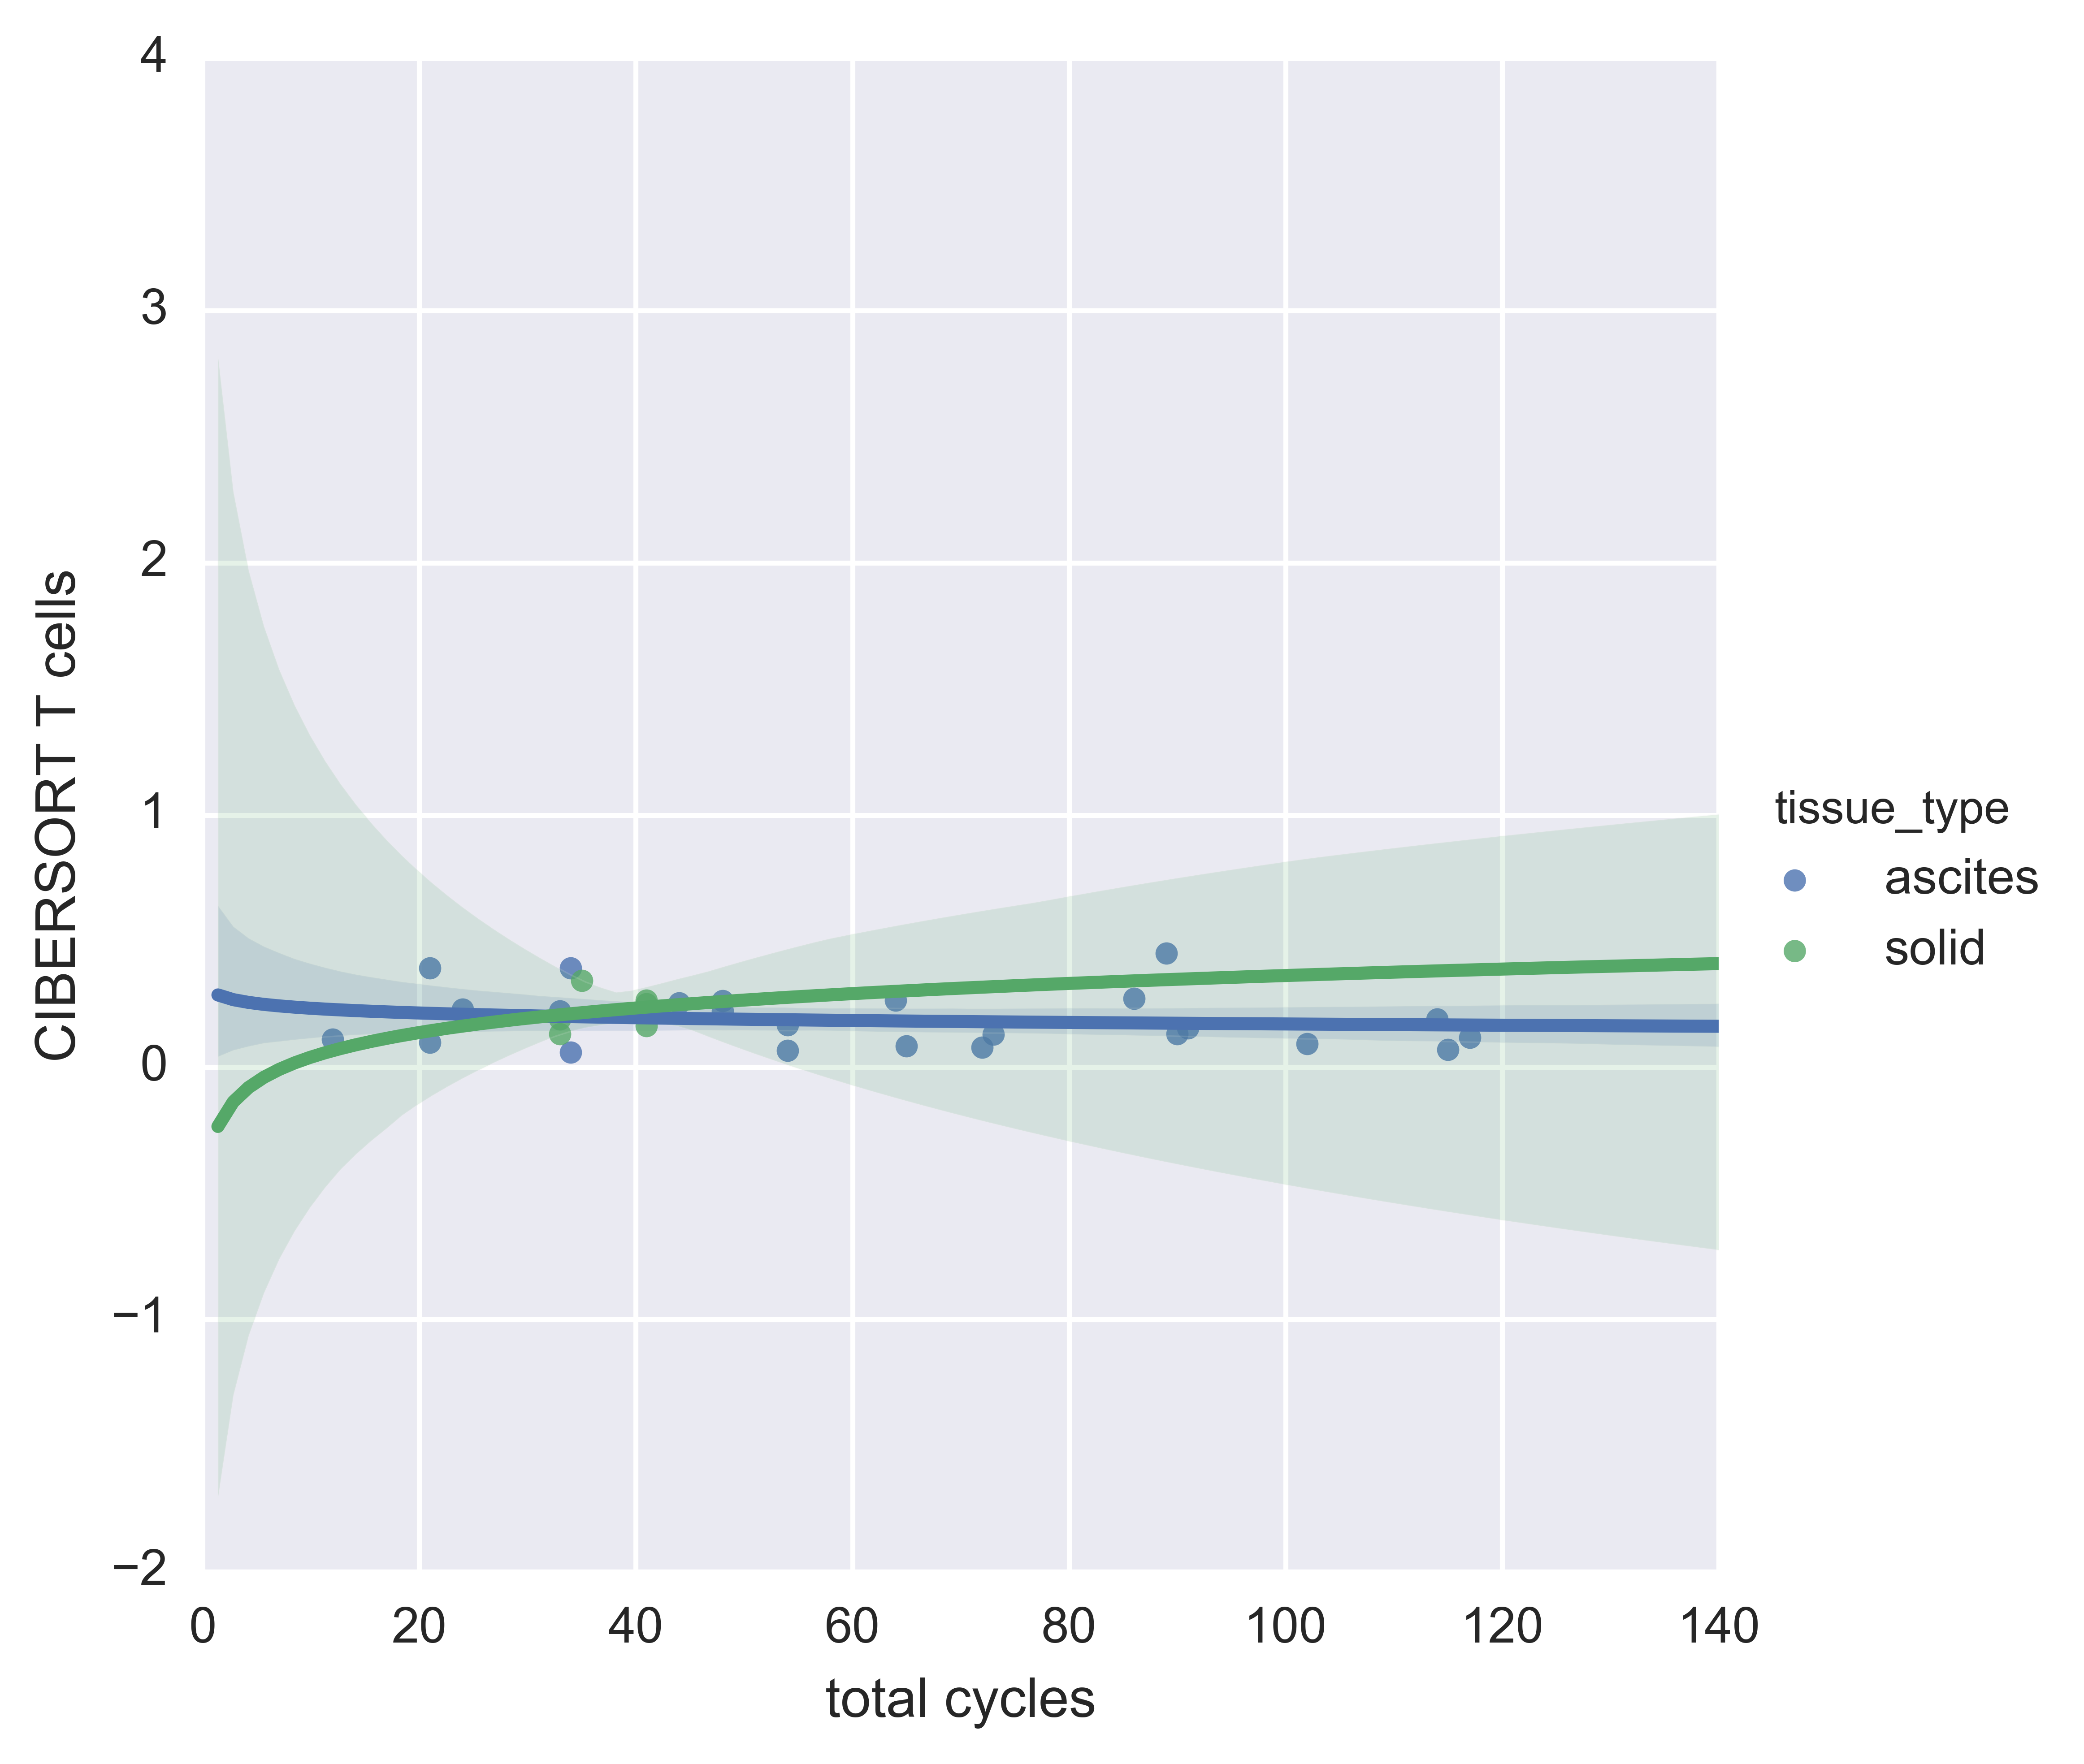

In [21]:
seaborn.lmplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == 'relapse/treated'],
    x="total cycles",
    y="CIBERSORT T cells",
    hue="tissue_type",
    logx=True,
)

#merged_df["snv neoantigens"]